# <p style="text-align: center;"> AQI in India </p>

In [1]:
from IPython.display import HTML
from IPython.display import Image
Image(url= "https://images.mapsofindia.com/liveblog/2018/10/air-quality-index-of-the-biggest-cities-in-india-f1.jpg")

In [2]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# <p style="text-align: center;"> Table of Contents </p>
- ## 1. Introduction
   - ### 1.1 [Abstract](#abstract)
   - ### 1.2 [Importing Libraries](#importing_libraries)
   - ### 1.3 [Dataset Summary](#dataset_summary)
   - ### 1.4 [Dataset Cleaning](#dataset_cleaning)
   - ### 1.5 [Exploratory Data Analysis (EDA)](#eda)
        - ### 1.5.1[Pointplot](#pointplot) 
        - ### 1.5.2[Heatmap](#heatmap)
        - ### 1.5.3[HeatMap Pivot](#heatmp)
        - ### 1.5.4[Regplot](#Regplot)
        - ### 1.5.5[Categorical Conversion](#catconversion)
- ## 2. [Linear Regression](#LinearRegression)
    - ### 2.1 [Linear Model 1](#LinearModel1)
    - ### 2.2 [Linear Model 2](#LinearModel2)
    - ### 2.3 [Linear Model 3](#LinearModel3)
- ## 3. [Logistic Regression](#LogisticRegression)
    - ### 3.1 [Logistic Model 1](#LogisticModel1)
    - ### 3.2 [Logistic Model 2](#LogisticModel2)
    - ### 3.3 [Logistic Model 3](#LogisticModel3) 
- ## 4. [Multicollinearity](#Multicollinearity)
- ## 5. [Stepwise Regression](#StepwiseRegression)
- ## 6. [Interaction Effect](#InteractionEffect)
    - ### 6.1 [All Columns-NO2,RSPM, SPM](#AllColumns)
    - ### 6.2 [RSPM & NO2](#RSPMNO2)
    - ### 6.3 [SPM & NO2](#SPMNO2)
    - ### 6.4 [RSPM & SPM](#RSPMSPM)
    - ### 6.5 [SPM](#SPM)
    - ### 6.6 [NO2](#NO2)
    - ### 6.7 [RSPM](#RSPM)
    - ### 6.8 [SPM & RSPM Interaction](#SPM&RSPM)
    - ### 6.9 [NO2 & SPM Interaction](#NO2&SPM)
- ## 7. [Regularization](#Regularization)
- ## 8. [Conclusion](#Conclusion)
- ## 9. [Contribution](#Contribution)
- ## 10. [Citation](#Citation)
- ## 11. [License](#License)

# <p style="text-align: center;">1. Introduction</p>

#   1.1 Abstract  <a id='abstract'></a>

In this Kernel , The following dataset "India Air Quality Data" by Shruti Bhargava has been analyzed. The main focus of this project is learning about modeling of data by supervised algorithms i.e (Linear Regression (regression) and Logistic Regression (classification)). The main focus of this particular kernel is AQI(Air Quality Index), and factors that affects AQI i.e (so2, no2, spm, rspm, pm2_5). Since in the following dataset we have the concentration of pollutants and we need each pollutants index for calculating the air quality index , so that is been calculated further in the process and has been utilised in analysis . Also in the following project there is a brief explanation of how combination of the independent variables (Interaction effect) has what impact on dependent variable and how is the accuracy of the model has been changed because of the same and how interdependence/ correlation (Multicollinearity) between various independent variable has adverse effect on the dependent varaiable and given data model. The solution to the problems of multicollinearity is also been discussed in the following kernel i.e Regularization and Stepwise Regression. Both of which gives us an enhanced model , with better predictors and estimators in alignment with dependent variable. Furthermore, following kernel contains some EDA(Explorartory Data Analysis)E which is usually the first step in your data analysis process. We take a broader look at patterns, trends, outliers, unexpected results and so on in the dataset, using visual and quantitative methods to get a sense of the story it tells. 

#   1.2 Importing Libraries  <a id='importing_libraries'></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.formula.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings; warnings.simplefilter('ignore')

# 1.3 Dataset Summary <a id='dataset_summary'></a>

### Statistcal analysis of given dataset

In [4]:
dataset=pd.read_csv('data.csv',encoding="ISO-8859-1")
dataset.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


The dataset consists primarily 5 different types pollutants measured over the years in different states and cities of India. Where *SO2* and *NO2* are harmful gaseous emmissions; *rspm, spm* and *pm2_5* come under susended air pollutants.

### Information about each column and about null values for each column

In [5]:
print(dataset.info())

#Now, we can immediatly see that there are quite a few nulls in various columns, 
#which need work and first need a closer inspection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB
None


### The following table shows the first five rows of the given dataset, thereby giving us insight about what sort of dataset it is. And what are the attributes included in the dataset.

In [6]:
dataset.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


Clearly there are lots of null values, noticeably in stn_code,agency, both of which should therefore be not ncluded further in the analysis.

Intuitively, these two columns will hardly add much value to analysis.

Now, focusing on the categorical variables, we are left with location_monitoring_station which consists of considerable nulls (approximately 27000).

**It would have been useful to have those values for an in depth analysis, but for now we will keep it out because of the null values and come back later if needed.

Out of the two dates columns, immediate attention goes to sampling date which has different formats within, highlighting some data input issues.
While, it is importnat to have this metric, more useful is to go back to the origin of the dataset and ask relevant questions,as to why are there different formats? Is it a human error or error due to incorporating different formats.For now, we will keep it out and only have the date column.

#   1.4 Dataset Cleaning  <a id='dataset_cleaning'></a>

### Following tables gives information about new dataset after dropping of unneccessary columns

In [7]:
dataset.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
state       435742 non-null object
location    435739 non-null object
type        430349 non-null object
so2         401096 non-null float64
no2         419509 non-null float64
rspm        395520 non-null float64
spm         198355 non-null float64
pm2_5       9314 non-null float64
date        435735 non-null object
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


Now that we know that our dataset has missing values, we need to find the columns which has those values alongwith, the percentage effect it has with respect to whole dataset.

#### Table Overview:- Following table gives us the column names with the number of missing values and percentage effect it has with respect to dataset

In [8]:
#Finding missing values in the data set 
total = dataset.isnull().sum()[dataset.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(dataset)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
pm2_5,426428,97.86
spm,237387,54.48
rspm,40222,9.23
so2,34646,7.95
no2,16233,3.73
type,5393,1.24
date,7,0.00
location,3,0.00


#### Since we don't have any idea about how the data is distributed, and what to take as a measure of central tendency ,it is always advisable to remove outliers. Since outliers has a huge effect on mean , though it does not effect mode and median very much. And usually we use mean as the measure, so we will be removing outliers for the dataset for important columns

In [9]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    #return df_out

remove_outlier(dataset,'so2')
remove_outlier(dataset,'no2')
remove_outlier(dataset,'rspm')
remove_outlier(dataset,'spm')



#### Following table gives statewise distribution of all the major pollutants i.e so2, no2, rspm, spm, pm2_5

In [10]:
dataset.groupby('state')[['spm','pm2_5','rspm','so2','no2']].mean()

,spm,pm2_5,rspm,so2,no2
state,,,,,
Andhra Pradesh,200.260378,NaN,78.182824,7.284845,21.704451
Arunachal Pradesh,NaN,NaN,76.629213,3.179104,5.469697
Assam,153.355386,NaN,93.724912,6.723263,14.793691
Bihar,276.917416,NaN,123.705176,19.381476,36.575525
Chandigarh,206.056150,NaN,96.587079,2.676986,18.619404
Chhattisgarh,231.290969,NaN,126.472399,12.846609,24.815961
Dadra & Nagar Haveli,170.545024,30.511628,76.536530,8.939587,18.293959
Daman & Diu,145.681416,27.886364,73.749431,8.192958,16.168926
Delhi,399.402088,95.113208,196.639771,8.737273,53.489147


### Missing values being filled in columns

Since we already know that our dataset contains missing values , and we need to fill them for our further analysis . We will be using Imputation to fill inour missing values. Imputation is the process of replacing missing data with substituted values . Because missing data can create problems for analyzing data, imputation is seen as a way to avoid pitfalls involved with listwise deletion of cases that have missing values. 

In [11]:
by_State=dataset.groupby('state')

def impute_mean(series):
    return series.fillna(series.mean())

dataset['rspm']=by_State['rspm'].transform(impute_mean)
dataset['so2']=by_State['so2'].transform(impute_mean)
dataset['no2']=by_State['no2'].transform(impute_mean)
dataset['spm']=by_State['spm'].transform(impute_mean)
dataset['pm2_5']=by_State['pm2_5'].transform(impute_mean)





#imputer = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
#imputer = imputer.fit(dataset.groupby('state').iloc[:, 3:8].values)
#dataset.iloc[:,3:8] = imputer.transform(dataset.iloc[:, 3:8].values)
#dataset.info()


#### Understanding the pollutants briefly .

NO2: Nitrogen Dioxide and is emmitted mostly from combustion from power sources or transport.

SO2: Sulphur Dioxide and is emmitted mostly from coal burning, oil burning, manufacturing of Sulphuric acid.

spm: Suspended particulate matter and are known to be the deadliest form of air pollution. They are microscopic in nature and are found to be suspended in earth's atmosphere.

rspm: Respirable suspended particulate matter. A sub form of spm and are respnsible for respiratory diseases.

pm2_5: Suspended particulate matter with diameters less than 2.5 micrometres. They tend to remain suspended for longer durations and potentially very harmful.



In [12]:
#Missing values being filled in columns
for col in dataset.columns.values:
    if dataset[col].isnull().sum() == 0:
        continue
    if col == 'date':
        guess_values = dataset.groupby('state')['date'].apply(lambda x: x.mode().max())
    elif col=='type':
        guess_values = dataset.groupby('state')['type'].apply(lambda x: x.mode().max())
    else:
        guess_values = dataset.groupby('state')['location'].apply(lambda x: x.mode().max())
dataset.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,1990-03-01


### Derivation for Individual Pollutant Index and AQI

The AQI is an index for reporting daily air quality. It tells you how clean or polluted your air is, and what associated health effects might be a concern for you. The AQI focuses on health effects you may experience within a few hours or days after breathing polluted air. EPA
calculates the AQI for five major air pollutants regulated by the Clean Air Act: groundlevel ozone, particle pollution Air quality directly affects (also known as particulate our quality of life. matter), carbon monoxide, sulfur dioxide, and nitrogen dioxide. For each of these
pollutants, EPA has established national air quality standards to protect public health.

AQI is calculated on the range of 0-500, we are scaling the values according to the AQI calculation formula


\begin{equation*}
AQI = AQI_{min} +  \frac{PM_{Obs}-PM_{Min}}{AQI_{Max}-AQI_{Min}}{(PM_{Max}-PM_{Min})}
\end{equation*}

#### Function to calculate so2 individual pollutant index(si)
The index category for SO2 is scaled between 0-1600. So on applying formula which is used to calculate AQI

In [13]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
dataset['si']=dataset['so2'].apply(calculate_si)
df= dataset[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


#### Function to calculate no2 individual pollutant index(ni)
The index category for NO2 is scaled between 0-400. So on applying formula which is used to calculate AQI

In [14]:
#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
dataset['ni']=dataset['no2'].apply(calculate_ni)
df= dataset[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


#### Function to calculate rspm individual pollutant index(rpi)
The index category for rspm is scaled between 0-400. So on applying formula which is used to calculate AQI

In [15]:
#Function to calculate rspm individual pollutant index(rpi)
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
dataset['rpi']=dataset['rspm'].apply(calculate_si)
df= dataset[['rspm','rpi']]
df.head()
#df.tail()

,rspm,rpi
0,78.182824,97.72853
1,78.182824,97.72853
2,78.182824,97.72853
3,78.182824,97.72853
4,78.182824,97.72853


#### Function to calculate spm individual pollutant index(spi)
The index category for rspm is scaled between 0-430. So on applying formula which is used to calculate AQI

In [16]:
#Function to calculate spm individual pollutant index(spi)
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
dataset['spi']=dataset['spm'].apply(calculate_spi)
df= dataset[['spm','spi']]
df.head()


,spm,spi
0,200.260378,166.840252
1,200.260378,166.840252
2,200.260378,166.840252
3,200.260378,166.840252
4,200.260378,166.840252


#### Function to calculate pm2_5 individual pollutant index(pmi)
The index category for rspm is scaled between 0-430. So on applying formula which is used to calculate AQI

In [17]:
#Function to calculate pm2_5 individual pollutant index(pmi)
def calculate_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
dataset['pmi']=dataset['pm2_5'].apply(calculate_pmi)
df= dataset[['pm2_5','pmi']]
#df.tail()

#### Function to calculate the air quality index (AQI) of every data value its is calculated as per indian govt standards
The purpose of the AQI is to help you understand what
local air quality means to your health. Also it is scaled from 0 to 500.

In [18]:
from IPython.display import Image
Image(url= "http://airquality.deq.idaho.gov/Information_AQI_files/image002.jpg")

In [19]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
dataset['AQI']=dataset.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= dataset[['state','si','ni','rpi','spi','AQI']]
df.head()


df.head()

,state,si,ni,rpi,spi,AQI
0,Andhra Pradesh,6.000,21.750,97.72853,166.840252,166.840252
1,Andhra Pradesh,3.875,8.750,97.72853,166.840252,166.840252
2,Andhra Pradesh,7.750,35.625,97.72853,166.840252,166.840252
3,Andhra Pradesh,7.875,18.375,97.72853,166.840252,166.840252
4,Andhra Pradesh,5.875,9.375,97.72853,166.840252,166.840252


#### *Now that we have a definitive dataset, that is one without null values we can employ various machine learning algorithms to see* *how are dependent and independent variable are related. And also to do Exploratory Data Analysis on the given dataset.*

#    <p style="text-align: center;">1.5 Exploratory Data Analysis (EDA)  <a id='eda'></a>

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

##   1.5.1  Pointplot  <a id='pointplot'></a>

### Graph Overview:- Visualization of AQI across india (Year-wise)

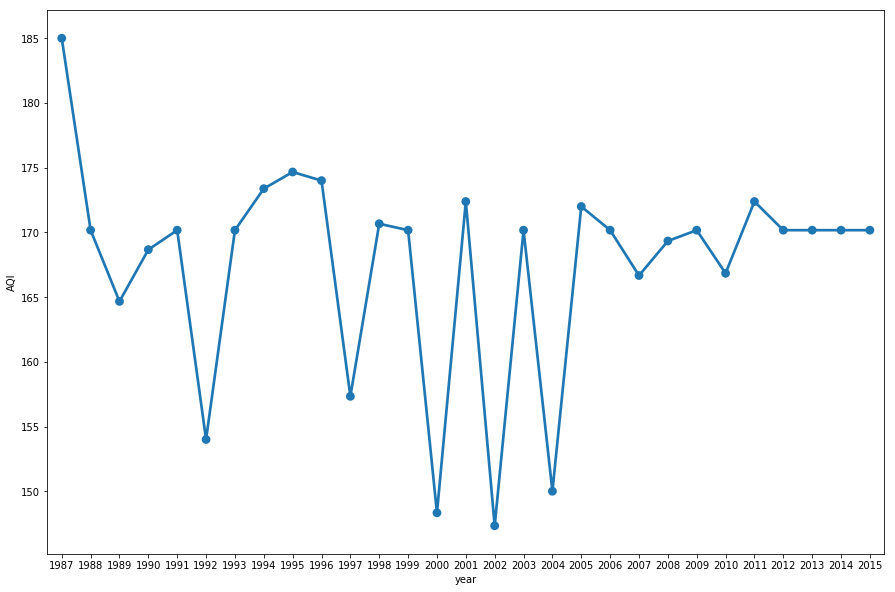

In [20]:
#Visualization of AQI across india 

dataset['date'] = pd.to_datetime(dataset['date'],format='%Y-%m-%d') # date parse
dataset['year'] = dataset['date'].dt.year # year
dataset['year'] = dataset['year'].fillna(0.0).astype(int)
dataset = dataset[(dataset['year']>0)]

df = dataset[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=df)

### Table Overview:- Exploring air pollution state-wise 

In [21]:
#Exploring air pollution state-wise
dataset.fillna(0.0,inplace=True)
states=dataset.groupby(['state','location'],as_index=False).mean()
state=states.groupby(['state'],as_index=False).mean()
state

,state,so2,no2,rspm,spm,pm2_5,si,ni,rpi,spi,pmi,AQI,year
0,Andhra Pradesh,7.005150,17.705235,73.718197,197.085630,0.000000,8.740983,22.091476,84.591479,165.285154,0.000000,165.901863,2011.649547
1,Arunachal Pradesh,3.179104,5.469697,76.629213,0.000000,0.000000,3.973881,6.837121,84.939295,0.000000,0.000000,0.000000,2014.666667
2,Assam,6.297072,14.122107,79.860142,141.421396,0.000000,7.871341,17.652233,81.545275,126.050825,0.000000,126.577559,2011.302031
3,Bihar,33.321814,42.324845,123.705176,281.948937,0.000000,40.939075,52.833105,113.740949,233.301398,0.000000,234.617619,1997.542211
4,Chandigarh,2.676986,18.619404,96.587079,206.056150,0.000000,3.346232,23.271826,96.646110,174.128162,0.000000,174.262893,2009.221831
5,Chhattisgarh,11.964182,25.336867,127.909085,233.774753,0.000000,14.955227,31.670710,114.758968,192.639060,0.000000,192.897348,2010.187112
6,Dadra & Nagar Haveli,8.037770,15.451606,76.720537,149.020211,30.511628,10.047213,19.314507,91.353542,132.029920,30.511628,138.964052,2004.342285
7,Daman & Diu,7.339134,12.615693,73.749431,127.996169,27.886364,9.173918,15.769616,89.039467,114.877290,27.886364,124.524897,2000.611876
8,Delhi,8.737273,53.489147,196.639771,399.402088,95.113208,10.908845,65.928540,136.469616,332.640733,94.889452,332.829348,2006.803415
9,Goa,7.424731,11.790294,59.443098,57.524474,18.995716,9.254478,14.737801,69.158024,56.055605,18.984334,79.622941,2011.932261


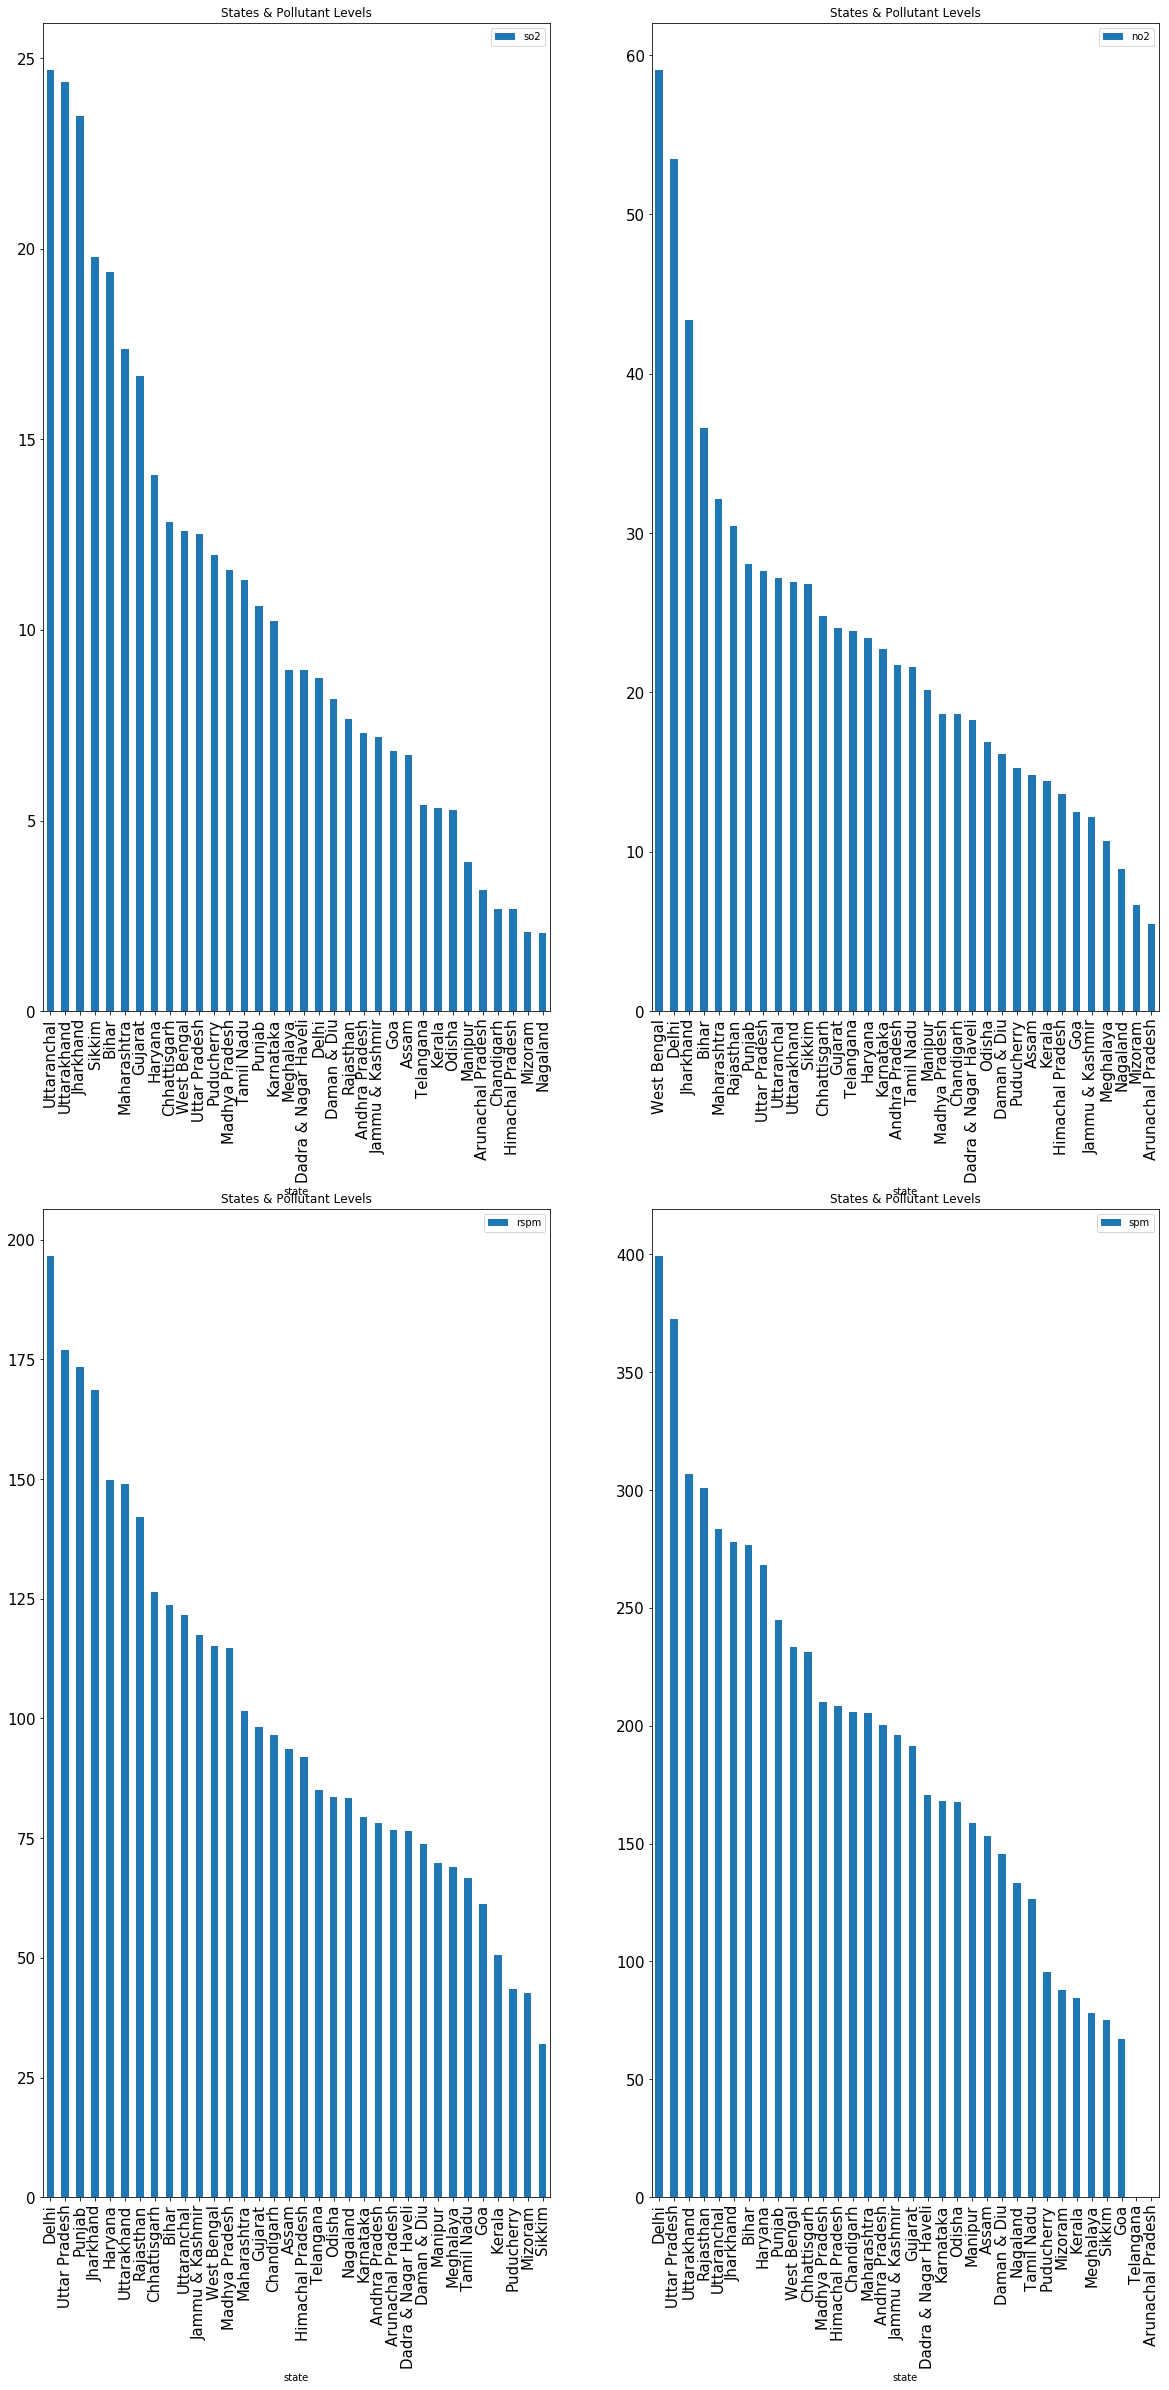

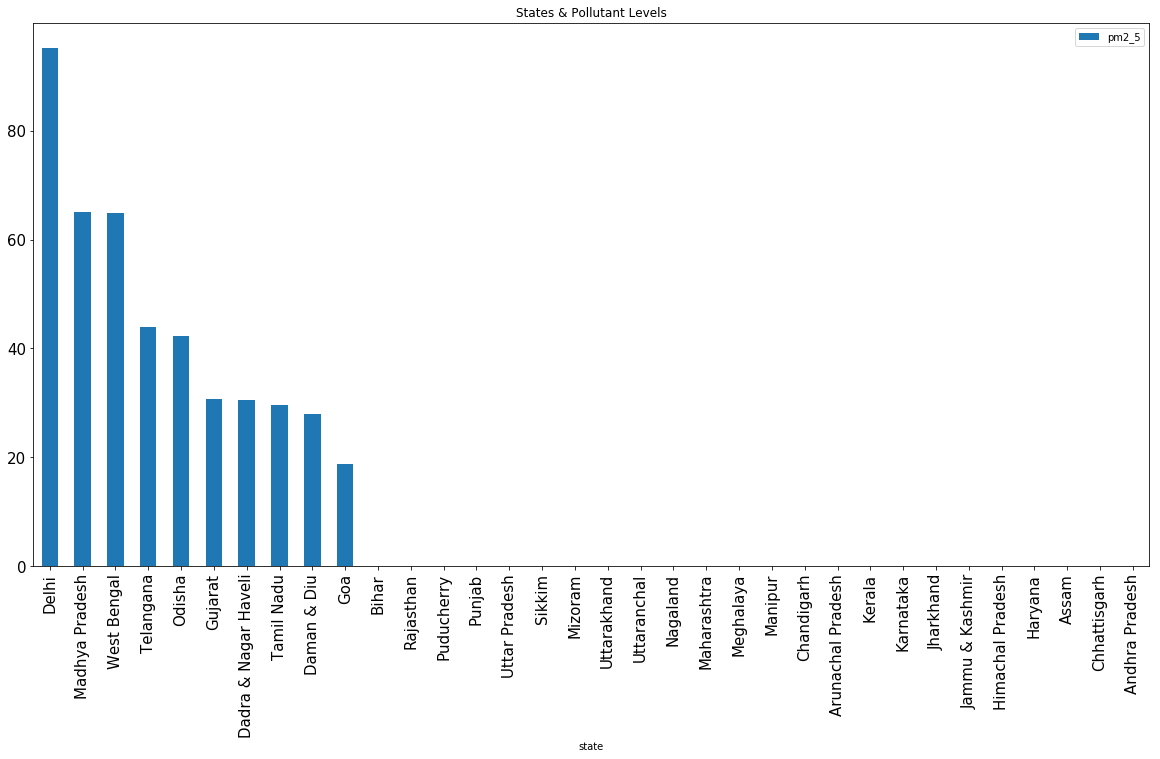

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40,40))
state_pollution = dataset[['state','so2']].groupby('state').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('so2', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,10), x = 'state', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[0][0])

state_pollution_no2 = dataset[['state','no2']].groupby('state').mean()
state_pollution_no2.reset_index(inplace = True)
state_pollution_no2.sort_values('no2', ascending= False, inplace = True)
state_pollution_no2.plot(kind = 'bar', figsize= (20,10), x = 'state', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[0][1])

state_pollution_rspm = dataset[['state','rspm']].groupby('state').mean()
state_pollution_rspm.reset_index(inplace = True)
state_pollution_rspm.sort_values('rspm', ascending= False, inplace = True)
state_pollution_rspm.plot(kind = 'bar', figsize= (20,40), x = 'state', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[1][0])


state_pollution_spm = dataset[['state','spm']].groupby('state').mean()
state_pollution_spm.reset_index(inplace = True)
state_pollution_spm.sort_values('spm', ascending= False, inplace = True)
state_pollution_spm.plot(kind = 'bar', figsize= (20,40), x = 'state', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[1][1])


state_pollution = dataset[['state','pm2_5']].groupby('state').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('pm2_5', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,10), x = 'state', fontsize= 15, title = 'States & Pollutant Levels')



## 1.5.2 Heatmap  <a id='heatmap'></a>

Correlation is any statistical association, though in common usage it most often refers to how close two variables are to having a linear relationship with each other. The correlation coefficient r measures the strength and direction of a linear relationship between two variables on a scatterplot. if r>0 higher the correlation and if r<0 correlation is inversely related.

### Visual representation in form of heatmap for correlated data

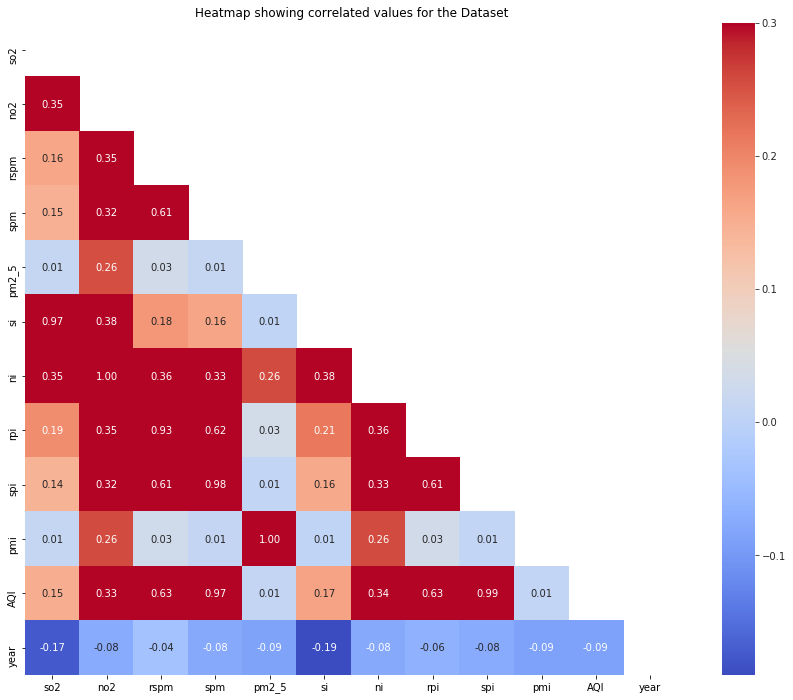

In [37]:
#correlation
dataset.corr()
plt.figure(figsize=(16,12))
ax=plt.axes()
#sns.heatmap(data=fifa_dataset.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm',ax=ax)
mask = np.zeros_like(dataset.iloc[:,:].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data=dataset.iloc[:,:].corr(), mask=mask, vmax=.3, annot=True,fmt='.2f', square=True, cmap='coolwarm')
    
ax.set_title('Heatmap showing correlated values for the Dataset')
plt.show()


## 1.5.3 Heatmap Pivot  <a id='heatmp'></a>

### AQI By State and Year

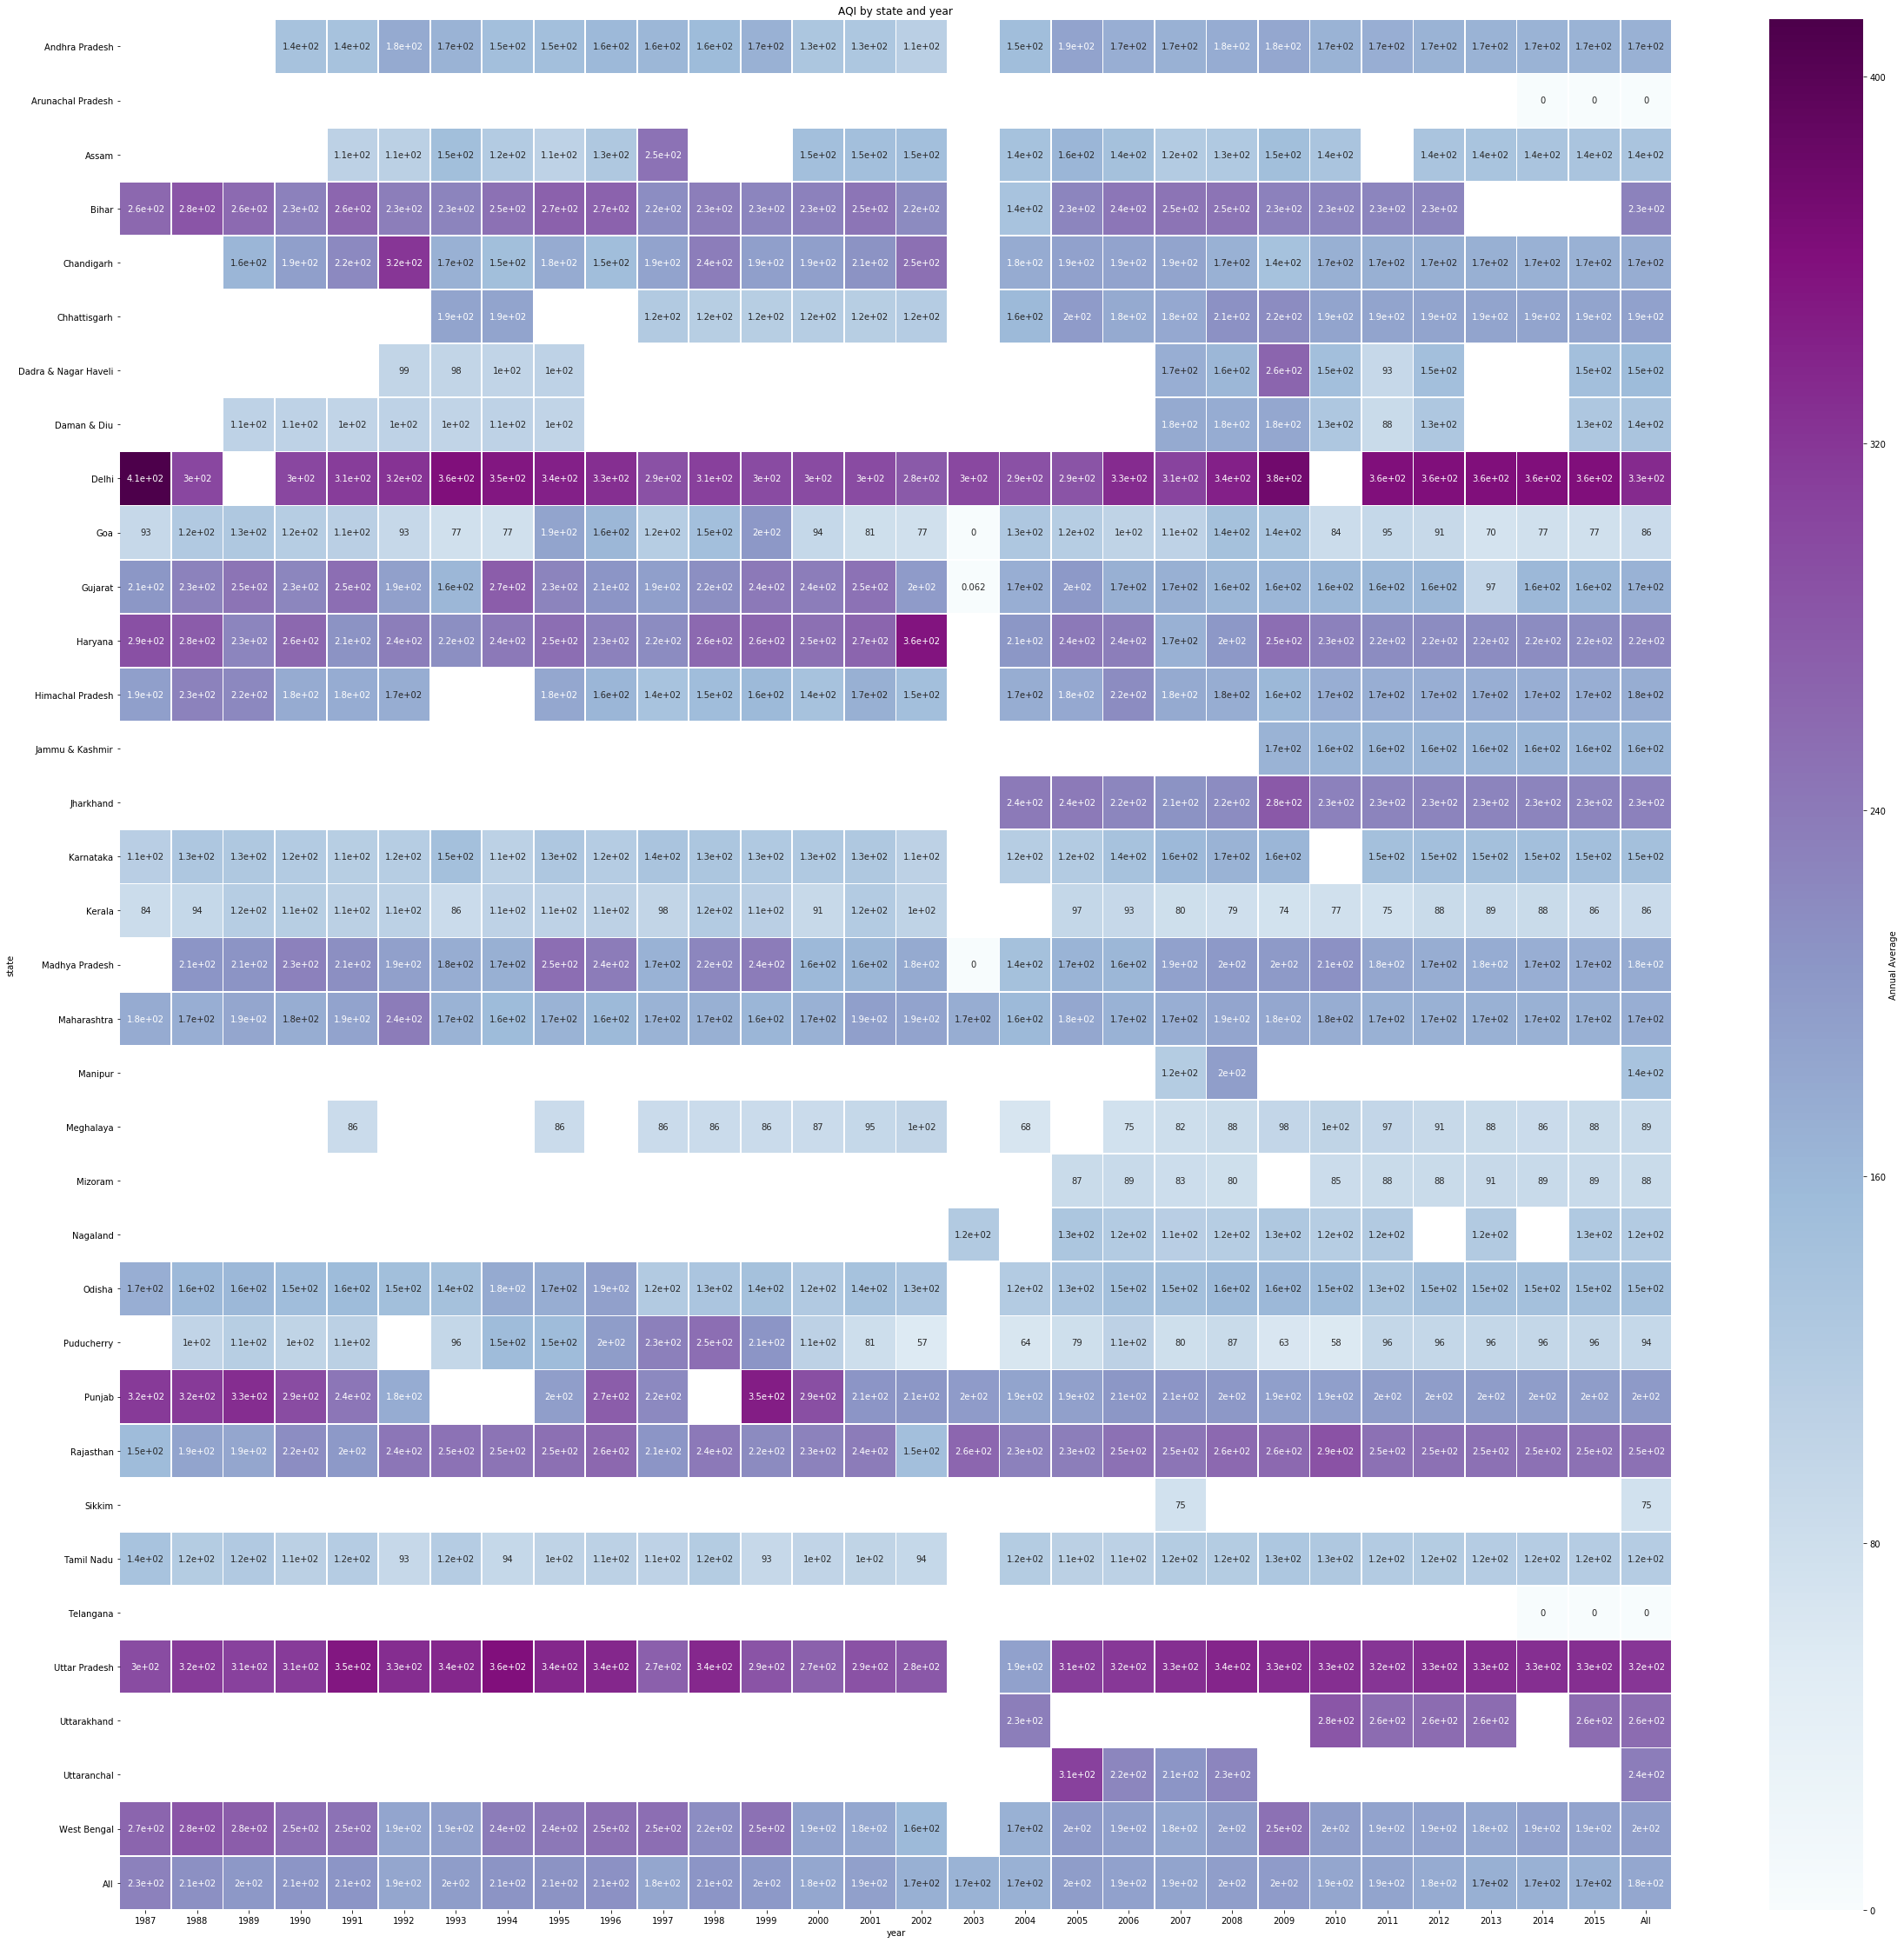

In [38]:
#Heatmap Pivot with State as Row, Year as Col, AQI as Value
dataset['date'] = pd.to_datetime(dataset['date'],format='%Y-%m-%d') # date parse
dataset['year'] = dataset['date'].dt.year # year
dataset['year'] = dataset['year'].fillna(0.0).astype(int)
dataset = dataset[(dataset['year']>0)]
f, ax = plt.subplots(figsize=(40,40))
ax.set_title('{} by state and year'.format('AQI'))
sns.heatmap(dataset.pivot_table('AQI', index='state',
                columns=['year'],aggfunc='mean',margins=True),
                annot=True,cmap="BuPu", linewidths=.75, ax=ax,cbar_kws={'label': 'Annual Average'})

## 1.5.4 Regplot  <a id='Regplot'></a>

Distribution of important independent variables and their relation with dependent variable i.e AQI is being depicted by the graph. Basically it plots data and a linear regression model fit.

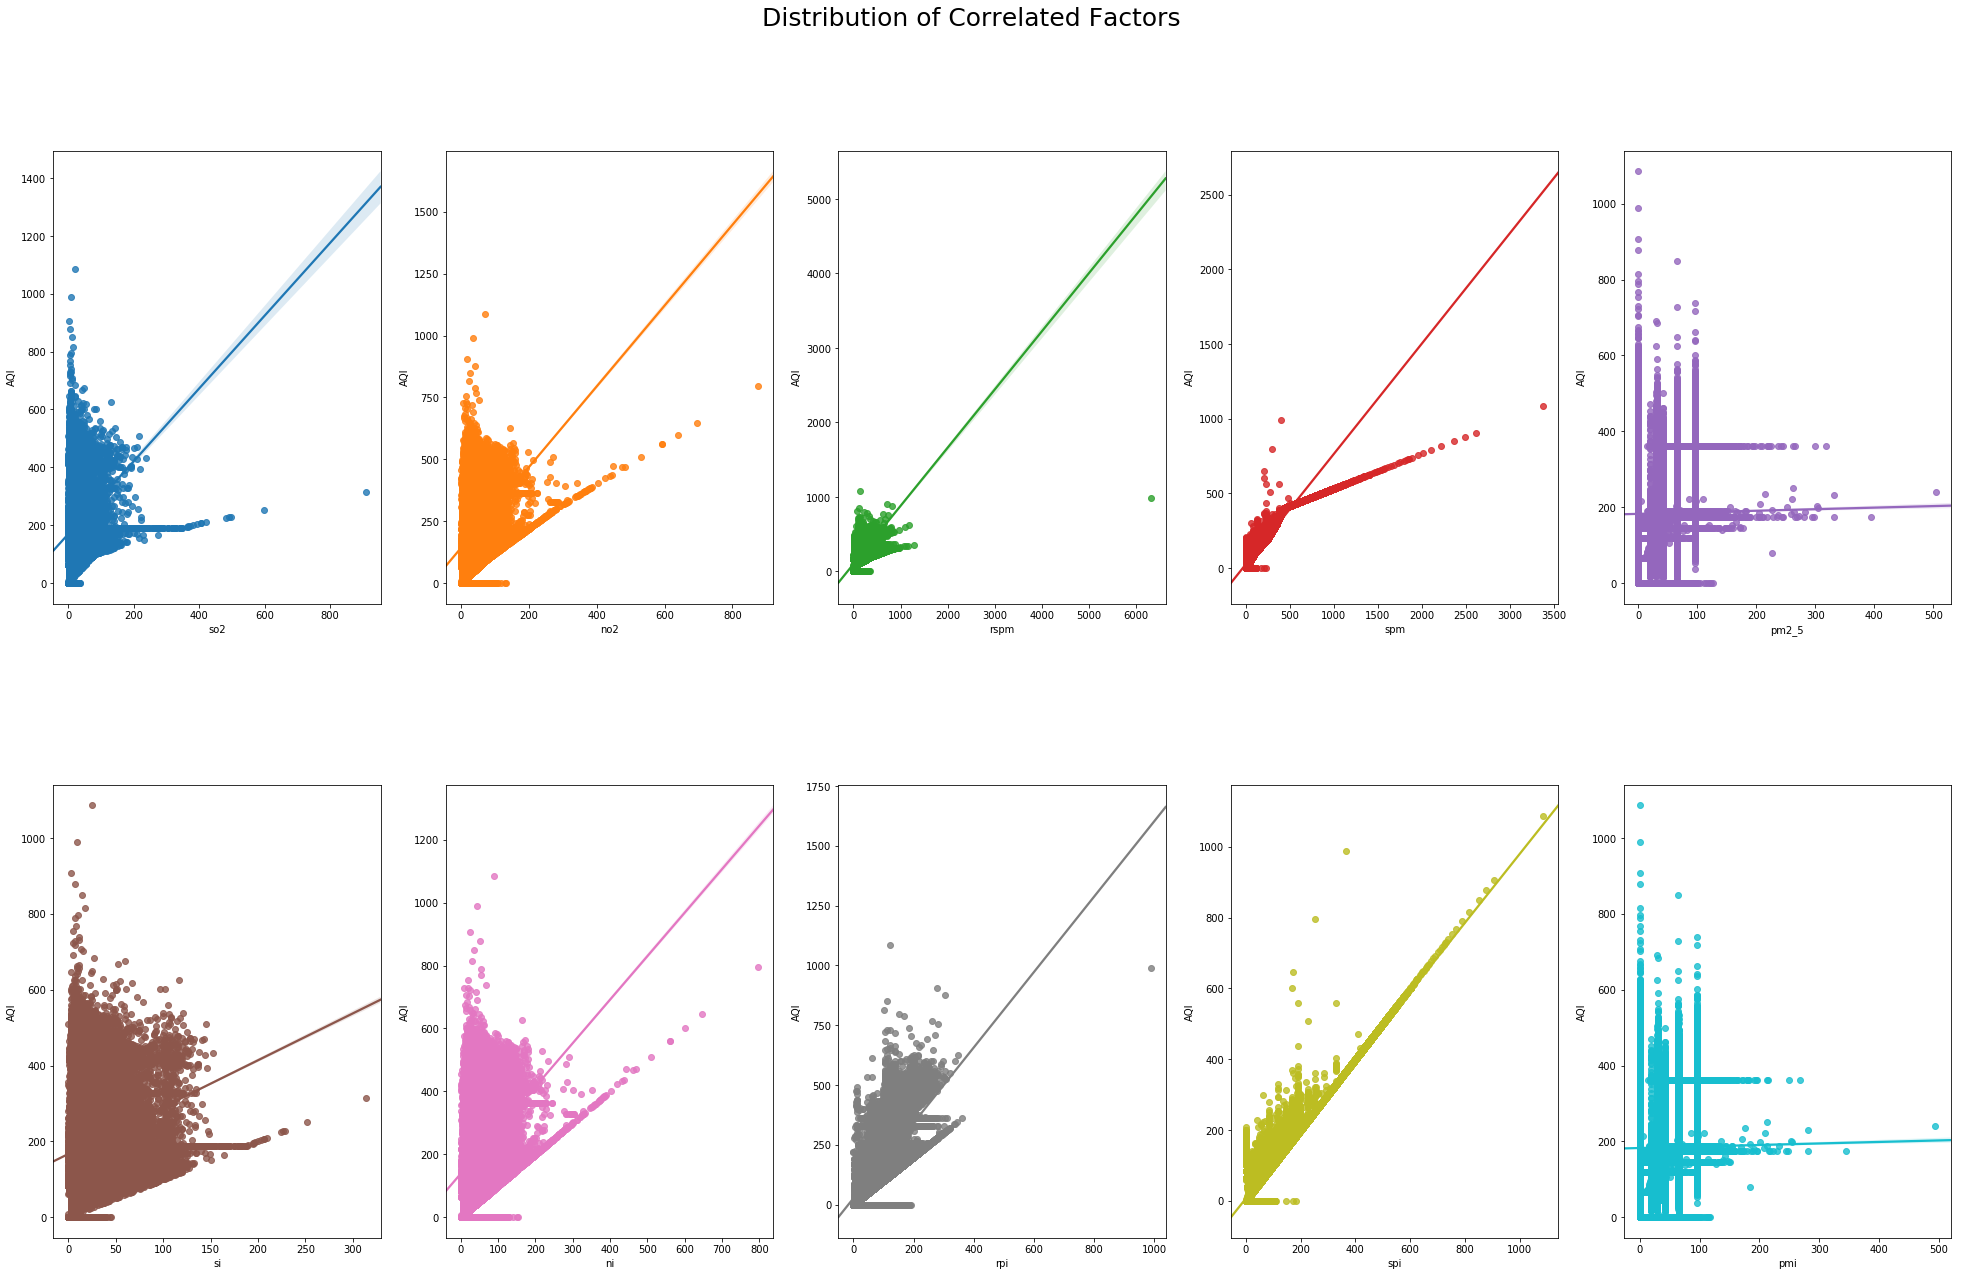

In [124]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(34,20))
plt.subplots_adjust(hspace=0.4)

z = pd.Series()
for col in dataset.columns.values[3:15]:
    if ((col!='AQI')&(col!='state')&(col!='location')&(col!='type')&(col!='date')&(col!='year')&(col!='state_label')&(col!='type_label')):
      
        colums=np.array(dataset[col])
        z[col]=colums
#p=z.loc[z.index]

for i in range(2):
    for j in range(5):
        
        #x=z.index.values[i*3+j]
        #sns.barplot(z.index[i*3+j],z.values[i*3+j])
        #x=z.index.values[i*3+j]
        
        y_label=z.index[i*5+j]
        x_label=z[i*5+j]
        
        sns.regplot(data=dataset, x=z.index[i*5+j], y='AQI',ax=axes[i,j])


fig.suptitle('Distribution of Correlated Factors', fontsize='25')
plt.show()

## 1.5.5 LMPlot  <a id='lmplot'></a>

Plot data and regression model fits across a FacetGrid.

This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset. In the given plot we are plotting state vs AQI 

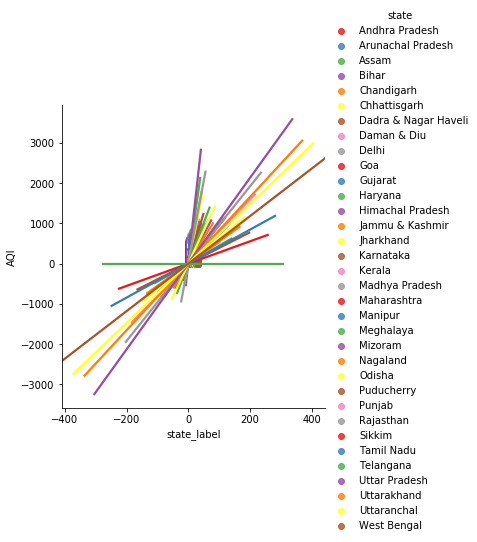

In [144]:
sns.lmplot(data=dataset, x='state_label', y='AQI', hue='state', palette='Set1')

## 1.5.5 Categorical Conversion  <a id='catconversion'></a>
#### Our analysis requires at least one independent variable which needs to be a multi-class categorical variable and a binary categorical variable and its conversion to numeric data.

We will be using cat coding and one hot encoding for the same, cat coding converts categorical data into numeric for use , basically it provides numbers for ordinal data. Cat coding creates a mapping of our sortable categories, e. g. old < renovated < new → 0, 1, 2

One hot encoding (binary values from categorical data)
A one hot encoding is a representation of categorical variables as binary vectors.  This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

And in our dataset state is a multiclass variable and type is a binary categorical variable. So we are changing them eventually. Further in our analysis we will be using cat coding only to convert our ordinal data.

We have mostly used cat coding as it changes the target column itself while in one hot encoding based on number of types the column holds, new columns be created according to the type with binary values i.e 1 and 0 . Thereby making data set much more complex and increasing redundancy. Although both methods be used for categorical to numeric conversion , we have preferred cat coding over one hot encoding

In [22]:
dataset['state_label'] = dataset['state'].astype('category')
cat_columns = dataset.select_dtypes(['category']).columns
dataset[cat_columns] = dataset[cat_columns].apply(lambda x: x.cat.codes)


In [23]:
dataset["type_label"]=dataset["type"].astype(str)
dataset["type_label"] = np.where(dataset["type"].str.contains('Residential, Rural and other Areas'), 1, 0)


#### Table Overview:- Gives the first 5 rows of the dataset with converted categorical variables i.e state_label and type_label

In [24]:

dataset.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,si,ni,rpi,spi,pmi,AQI,year,state_label,type_label
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,0.0,1990-02-01,6.000,21.750,97.72853,166.840252,0.0,166.840252,1990,0,1
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,0.0,1990-02-01,3.875,8.750,97.72853,166.840252,0.0,166.840252,1990,0,0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,0.0,1990-02-01,7.750,35.625,97.72853,166.840252,0.0,166.840252,1990,0,1
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,0.0,1990-03-01,7.875,18.375,97.72853,166.840252,0.0,166.840252,1990,0,1
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,0.0,1990-03-01,5.875,9.375,97.72853,166.840252,0.0,166.840252,1990,0,0


## <p style="text-align: center;">2. Linear Regression</p> <a id='LinearRegression'></a>

Linear regression is basically a linear approach to model the relationship shared between a scalar response (or dependent variable) i.e AQI and one or more explanatory variables (or independent variables) i.e SO2,NO2 etc

### Multiple Linear Regression

#### The case of multiple explanatory variable (independent variable) is called multiple linear regression.
To build a well-performing machine learning (ML) model, it is important to seperate data into training and testing dataset . Basically we are training the model on and testing it against the data that comes from the same set of target distribution. 

### Simple Linear Regression

The case of single explanatory variable (independent variable) is called single linear regression.¶  

#### We applied linear regression model on our dataset and calculated the value for Root Mean Squared Error ,Mean Squared Error(log), AIC and BIC

Root Mean Squared Error:-
Root Mean Square Error (RMSE) mathematically is the standard deviation of the residuals. Residuals is the measure od how far the data points are spreaded across the line of regression which we get by our training data set. RMSE is the measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

##### Mean Squared Error:-
The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points. RMSE is the square root of MSE.

##### Akaike information criterion (AIC):-
The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. When a statistical model is used to represent the process that generated the data, the representation will almost never be exact; so some information will be lost by using the model to represent the process. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.

In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting.
>
>\begin{equation*}
AIC = {2}\cdot\ {k} + {n}log(RSS/N)       
\end{equation*}
>
<p style="text-align: center;">where k=number of parameters, RSS=Residual Sum of Squares and n= number of rows</p>

##### Bayesian information criterion (BIC) :-
It is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC.
>
\begin{equation*}
BIC = {n}\cdot \ln(RSS/n) + {k}\cdot\ln(n)      
\end{equation*}
>
<p style="text-align: center;">where k=number of parameters, RSS=Residual Sum of Squares and n= number of rows</p>

 
##### P-value:-
In statistics, the p-value is a function of the observed sample results (a statistic) that is used for testing a statistical hypothesis. Before the test is performed, a threshold value is chosen, called the significance level of the test, traditionally 5% or 1% and denoted as $\alpha$.

If the p-value is equal to or smaller than the significance level ($\alpha$), it suggests that the observed data are inconsistent with the assumption that the null hypothesis is true and thus that hypothesis must be rejected (but this does not automatically mean the alternative hypothesis can be accepted as true). When the p-value is calculated correctly, such a test is guaranteed to control the Type I error rate to be no greater than $\alpha$.


#### Table Overview:- Top 5 rows of the dataset consisting of independent variables that have p-value<0.05
And we will be using the following Independent Variables present in the given dataset for modeling our data using linear regression.

In [25]:
data_p = dataset.drop(['state', 'location', 'type','date','AQI','year'],axis=1)
corr = data_p.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
selected_column=data_p.columns[columns]                
data_p=data_p[selected_column]



In [26]:
x_=data_p
y=dataset['AQI']
#factors with p-value
selected_columns_1 = selected_column[0:10].values
selected_columns_2=selected_column[11:].values
selected_columns=np.concatenate((selected_columns_1,selected_columns_2),axis=0)
import statsmodels.formula.api as smf
def backwardelimination(x, Y, sl, columns):
    numVars = len(x[0])
    
    for i in range(0, numVars):
        regressor_OLS = smf.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        
        if maxVar > sl:
          
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x,j,1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardelimination(x_.iloc[:,:].values, y.values, SL,selected_columns )




In [27]:
result = pd.DataFrame()
result['AQI'] = dataset.iloc[:,10]
#result.head()

data_p_selected = pd.DataFrame(data= data_modeled[:,0:9], columns = selected_columns)
data_p_selected.head()

,so2,no2,rspm,spm,si,ni,rpi,spi,type_label
0,4.8,17.4,78.182824,200.260378,6.000,21.750,97.72853,166.840252,0.0
1,3.1,7.0,78.182824,200.260378,3.875,8.750,97.72853,166.840252,0.0
2,6.2,28.5,78.182824,200.260378,7.750,35.625,97.72853,166.840252,0.0
3,6.3,14.7,78.182824,200.260378,7.875,18.375,97.72853,166.840252,0.0
4,4.7,7.5,78.182824,200.260378,5.875,9.375,97.72853,166.840252,0.0


Since we are to form 3 different linear models for our given project, it would be better if form a function for linear regression that could be utilised everytime we want to perform linear regression . Also, it makes the code less complex and easier to read.

We will also be validating our model. 
Cross Validation:- Cross Validation is a technique which involves reserving a particular sample of a dataset on which we do not train the model. Later, we will test our model on this sample before finalizing it.

We will be performing K-Fold Cross Validation.Below are the steps for it:

1. Randomly split your entire dataset into k”folds”
2. For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
3. Record the error you see on each of the predictions
4. Repeat this until each of the k-folds has served as the test set
5. The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model

In [28]:
def linear_regression(X,y):
#SPLIT TEST AND TRAIN
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#One Hot Encoding
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)

#Linear Regression
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)

    print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)
    print('r2_Square:%.2f '% r2_score(y_test, predictions))
    print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))
    print("KfoldCrossVal mean score using Linear regression is %s" %cross_val_score(LR,X_train,y_train,cv=10).mean())
    
    regressor_OLS = smf.OLS(y_train, X_train).fit()
    
    plt.figure(figsize=(18,10))
    plt.scatter(predictions,y_test,alpha = 0.3)
    plt.xlabel('Predictions')
    plt.ylabel('AQI')
    plt.title("Linear Prediction ")
    plt.show()
#cross validation    
    Kfold = KFold(len(X), shuffle=True)
    #X_train = sc.fit_transform(X_train)
    #X_test = sc.transform(X_test)
    z=print(regressor_OLS.summary())
    return z

   
        
    
    
    

In [29]:
####function to calculate cross validation score only
def cross_val(X,y):
    #SPLIT TEST AND TRAIN
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#One Hot Encoding
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)

#Linear Regression
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)
    Kfold = KFold(len(X), shuffle=True)
    print("KfoldCrossVal mean score using Linear regression is %s" %cross_val_score(LR,X_train,y_train,cv=10).mean())
    

## 2.1 Linear Model 1 <a id='LinearModel1'></a>

The Following plot gives us our first Linear Model along with the summary for the same.

>Training Features :- si, ni, rpi, spi, pmi

>Target Feature:- AQI


(87147, 4) (348588, 4) (87147,) (348588,)
r2_Square:0.99 
MSE:10.28 
KfoldCrossVal mean score using Linear regression is 0.9880610717071239


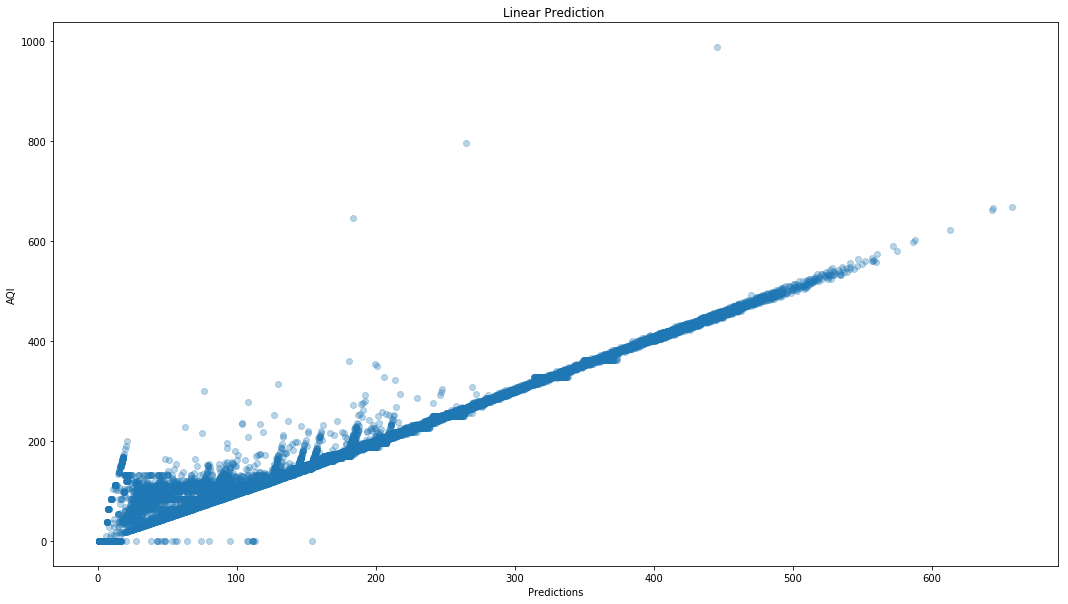

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.721e+07
Date:                Fri, 01 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:34:37   Log-Likelihood:            -1.2924e+06
No. Observations:              348588   AIC:                         2.585e+06
Df Residuals:                  348584   BIC:                         2.585e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
si             0.0249      0.001     16.686      0.0

In [30]:
X_1=dataset[['si','ni','rpi','spi']]
y_1=dataset['AQI']
linear_regression(X_1,y_1)

## 2.2 Linear Model 2 <a id='LinearModel2'></a>

The Following plot gives us our second Linear Model along with the summary for the same.

>Training Features :- so2, no2, pm2_5, spm

>Target Feature:- AQI


(87147, 4) (348588, 4) (87147,) (348588,)
r2_Square:0.95 
MSE:20.52 
KfoldCrossVal mean score using Linear regression is 0.9478375365850971


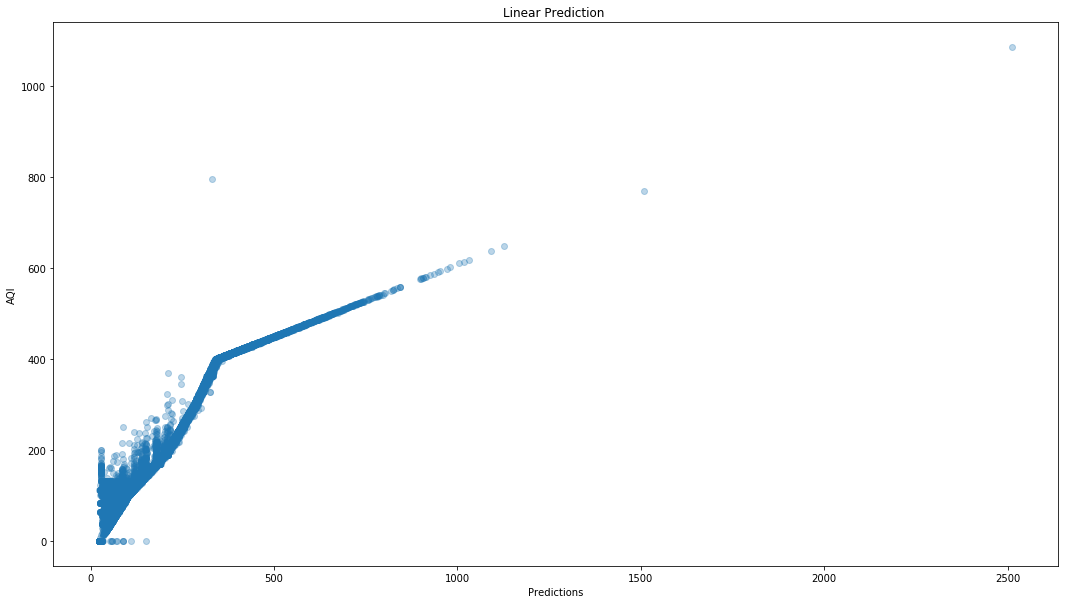

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 6.704e+06
Date:                Fri, 01 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:34:39   Log-Likelihood:            -1.5894e+06
No. Observations:              348588   AIC:                         3.179e+06
Df Residuals:                  348584   BIC:                         3.179e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
so2            0.2321      0.004     61.845      0.0

In [31]:
#Linear Regression
X_2= dataset.drop([ 'AQI','state','location','type','rspm','si','ni','rpi','spi','pmi','date','year','state_label','type_label'], axis = 1)
y_2 = dataset['AQI']
linear_regression(X_2,y_2)
#regressor_OLS = smf.OLS(y_train, X_train).fit()
#print("Model Summary")
#regressor_OLS.summary()


## 2.3 Linear Model 3 <a id='LinearModel3'></a>

The Following plot gives us our second Linear Model along with the summary for the same.

>Training Features :- rspm, spm, spi, rpi

>Target Feature:- AQI

(87147, 4) (348588, 4) (87147,) (348588,)
r2_Square:0.99 
MSE:9.96 
KfoldCrossVal mean score using Linear regression is 0.9879210801477285


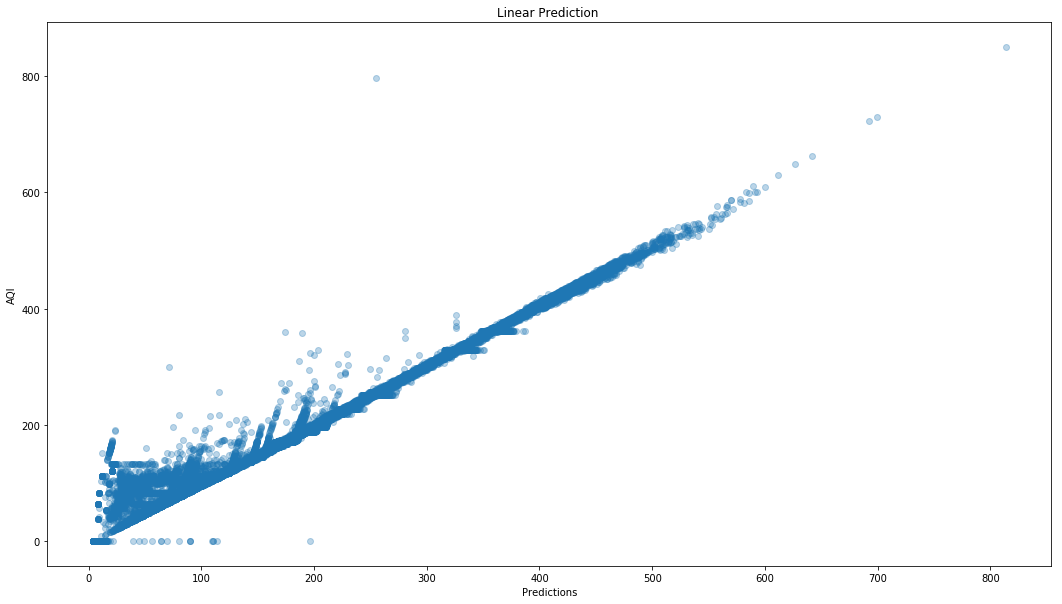

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.660e+07
Date:                Fri, 01 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:34:40   Log-Likelihood:            -1.2953e+06
No. Observations:              348588   AIC:                         2.591e+06
Df Residuals:                  348584   BIC:                         2.591e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rspm           0.0118      0.000     25.318      0.0

In [32]:
#Linear Regression
X_3= dataset.drop(['AQI','state','location','type','date','pmi','pm2_5','year','state_label','type_label','so2','no2','si','ni'], axis = 1)
y_3 = dataset['AQI']
linear_regression(X_3,y_3)
#SPLIT TEST AND TRAIN
#X_train, X_test, y_train, y_test = train_test_split(dataset_LR_3, target, test_size=0.2)

#One Hot Encoding
#X_train = pd.get_dummies(X_train)
#X_test = pd.get_dummies(X_test)
#print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)

#### Significant Questions on the basis of the all 3 Linear Models

##### * Is the relationship significant?   

By the results of all three models we can say , that the relationship between the dependent variable (AQI) and significant independent variables(so2,no2,si,ni,pm2_5,rpi,rspm,spm) are significant. 

##### * Are any model assumptions violated?    

Assumptions for Linear Regression are as follow:-
1. Linear relationship.
2. Multivariate normality.(correlated variables do clustering around mean value)
3. No or little multicollinearity.
5. No auto-correlation.
6. Homoscedasticity.(all random variables in the sequence have the same finite variance)

by the results we can say that they have linear relationship and no auto correlation for multicollinearity and multivariate normality please refer to section [Multicollinearity](#Multicollinearity)

##### * Does the model make sense? Interpret the meaning of each independent variable.   

All three model makes sense.And we can say as the value of each independent variable we have used increase AOI will increase.

##### * Cross-validate the model. How well did it do? 

For all three models cross validation gives good result, such that it is accurate.

##### * Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
AIC,BIC and adjusted R^2  for Linear Model 1 is the lowest, lowest and highest , hence it is the the one we should choose.


## <p style="text-align: center;">3. Logistic Regression</p> <a id='LogisticRegression'></a>

Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Difference between logistic and linear regression:-
In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values. In logistic regression, the outcome (dependent variable) has only a limited number of possible values(discrete). Also , we use logistic for classification purpose i.e for categorical variables.



Table Overview:- Following Table gives us dataset with new column i.e AQI_Range that specifies the type of AQI effect

In [33]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Unhealthy for sensitive groups"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

dataset['AQI_Range'] = dataset['AQI'] .apply(AQI_Range)
dataset.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,date,si,ni,rpi,spi,pmi,AQI,year,state_label,type_label,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,0.0,1990-02-01,6.000,21.750,97.72853,166.840252,0.0,166.840252,1990,0,1,Unhealthy for sensitive groups
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,0.0,1990-02-01,3.875,8.750,97.72853,166.840252,0.0,166.840252,1990,0,0,Unhealthy for sensitive groups
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,0.0,1990-02-01,7.750,35.625,97.72853,166.840252,0.0,166.840252,1990,0,1,Unhealthy for sensitive groups
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,0.0,1990-03-01,7.875,18.375,97.72853,166.840252,0.0,166.840252,1990,0,1,Unhealthy for sensitive groups
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,0.0,1990-03-01,5.875,9.375,97.72853,166.840252,0.0,166.840252,1990,0,0,Unhealthy for sensitive groups


#### Table Overview:- AQI_Range is converted to AQI_Label according to its 5 types using cat coding

In [34]:
dataset['AQI_label'] = dataset['AQI_Range'].astype('category')
cat_columns = dataset.select_dtypes(['category']).columns
dataset[cat_columns] = dataset[cat_columns].apply(lambda x: x.cat.codes)

dataset.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,date,si,ni,rpi,spi,pmi,AQI,year,state_label,type_label,AQI_Range,AQI_label
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,0.0,1990-02-01,6.000,21.750,97.72853,166.840252,0.0,166.840252,1990,0,1,Unhealthy for sensitive groups,4
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,0.0,1990-02-01,3.875,8.750,97.72853,166.840252,0.0,166.840252,1990,0,0,Unhealthy for sensitive groups,4
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,0.0,1990-02-01,7.750,35.625,97.72853,166.840252,0.0,166.840252,1990,0,1,Unhealthy for sensitive groups,4
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,0.0,1990-03-01,7.875,18.375,97.72853,166.840252,0.0,166.840252,1990,0,1,Unhealthy for sensitive groups,4
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,0.0,1990-03-01,5.875,9.375,97.72853,166.840252,0.0,166.840252,1990,0,0,Unhealthy for sensitive groups,4


#### Table Overview:- AQI_Range is converted to AQI_Range_Binary according to its 5 types using custom coding. Since for logistic we require binary categorical values only so we need to use either one hot encoding or custom coding .


In [35]:
def AQI_Range_Binary_Label(x):
    if x<=200:
        return 0
    elif x>200:
        return 1
    
dataset['AQI_Range_Binary'] = dataset['AQI'] .apply(AQI_Range_Binary_Label)
dataset.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,si,...,rpi,spi,pmi,AQI,year,state_label,type_label,AQI_Range,AQI_label,AQI_Range_Binary
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,0.0,1990-02-01,6.000,...,97.72853,166.840252,0.0,166.840252,1990,0,1,Unhealthy for sensitive groups,4,0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,0.0,1990-02-01,3.875,...,97.72853,166.840252,0.0,166.840252,1990,0,0,Unhealthy for sensitive groups,4,0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,0.0,1990-02-01,7.750,...,97.72853,166.840252,0.0,166.840252,1990,0,1,Unhealthy for sensitive groups,4,0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,0.0,1990-03-01,7.875,...,97.72853,166.840252,0.0,166.840252,1990,0,1,Unhealthy for sensitive groups,4,0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,0.0,1990-03-01,5.875,...,97.72853,166.840252,0.0,166.840252,1990,0,0,Unhealthy for sensitive groups,4,0


### Box Plot AQI Dataset Scaled

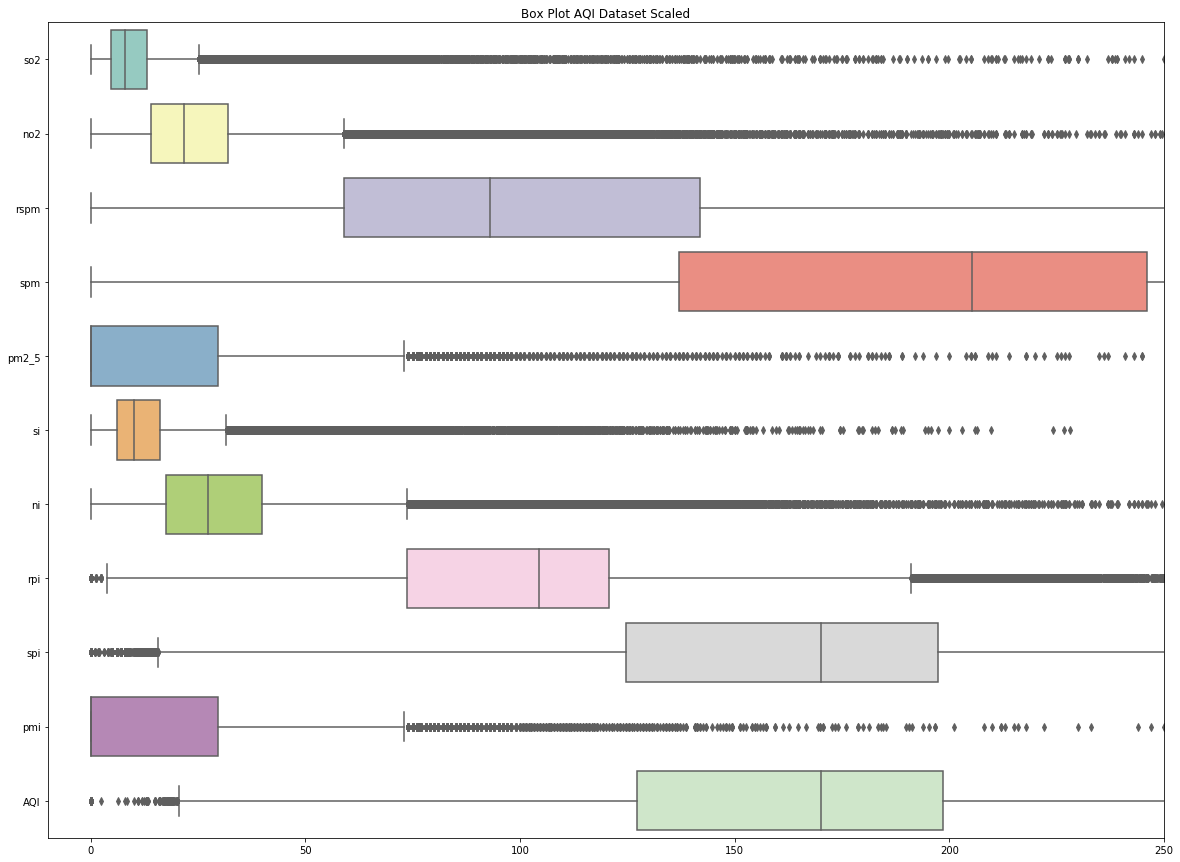

In [36]:
dataset_box=dataset.drop(['state', 'location', 'date','state_label',
       'type_label','type','AQI_label','AQI_Range_Binary','year','AQI_Range'],axis=1)
f, ax = plt.subplots(figsize=(20, 15))

ax.set_facecolor('#FFFFFF')
plt.title("Box Plot AQI Dataset Scaled")
ax.set(xlim=(-10, 250))
ax = sns.boxplot(data = dataset_box, 
  orient = 'h', 
  palette = 'Set3')

Following gives us the list of predictors that we need to rank in order to see which variables we should use for our logistic model

In [37]:
predictor_names=dataset_box.columns.get_values()
predictor_names=predictor_names.tolist()
predictor_names.pop()
predictor_names


['so2', 'no2', 'rspm', 'spm', 'pm2_5', 'si', 'ni', 'rpi', 'spi', 'pmi']

Following gives us the dictionary of predictors that have been ranked in order to see which variables we should use for our logistic model. We are using median as to rank the predictors.

In [38]:
def rank_predictors(dat,l,f='AQI_Range_Binary'):
    rank={}
    max_vals=dat.max()
    median_vals=dat.groupby(f).median()  # We are using the median 
    for p in l:
        score=np.abs((median_vals[p][1]-median_vals[p][0])/max_vals[p])
        rank[p]=score
    return rank
cat_rank=rank_predictors(dataset,predictor_names) 
cat_rank

{'so2': 0.0022002200220021992,
 'no2': 0.012557077625570776,
 'rspm': 0.013318464572002605,
 'spm': 0.05828402366863905,
 'pm2_5': 0.0,
 'si': 0.007971303308090873,
 'ni': 0.017259414225941423,
 'rpi': 0.030184097703318313,
 'spi': 0.16236259814418275,
 'pmi': 0.0}

Sorted List of Ranked Predictors depending on previous function

In [39]:
# Take the top predictors based on mean difference
cat_rank=sorted(cat_rank.items(), key=lambda x: x[1],reverse= True)

ranked_predictors=[]
for f in cat_rank:
    ranked_predictors.append(f[0])
ranked_predictors



['spi', 'spm', 'rpi', 'ni', 'rspm', 'no2', 'si', 'so2', 'pm2_5', 'pmi']

In [40]:
data_log=dataset.drop(['state','type','date','location'],axis=1)


Since we are to form 3 different logistic models for our given project, it would be better if form a function for logistic regression that could be utilised everytime we want to perform logistic regression . Also, it makes the code less complex and easier to read.

We will also be validating our model. Cross Validation:- Cross Validation is a technique which involves reserving a particular sample of a dataset on which we do not train the model. Later, we will test our model on this sample before finalizing it.

We will be performing K-Fold Cross Validation.Below are the steps for it:

Randomly split your entire dataset into k”folds”
For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
Record the error you see on each of the predictions
Repeat this until each of the k-folds has served as the test set
The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model.

    
    
##### Predicting the Test set results(Classification Report - Interpreting meaning of values we get in it)
Precision – Accuracy of positive predictions.

\begin{equation*}
Precision =(\frac{TP}{TP+FP})   
\end{equation*}

FN – False Negatives
Recall (aka sensitivity or true positive rate): Fraction of positives That were correctly identified.

\begin{equation*}
Recall =(\frac{TP}{TP+FN})   
\end{equation*}

F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.

\begin{equation*}
F1 = {2}\times(\frac{precision\times recall}{precision + recall})   
\end{equation*}




AUC/ROC curve:- The ROC curve is a fundamental tool for diagnostic test evaluation.
In a ROC curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points of a parameter. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. The area under the ROC curve (AUC) is a measure of how well a parameter can distinguish between two diagnostic groups (diseased/normal).

In [41]:
def logistic_regression(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
    sc = StandardScaler()
    
    # Feature scaling
    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test)
    
    #Fitting logistic regression to the training set
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(x_train,y_train)
    
    
    # Logistic regression cross validation
    #Kfold = KFold(len(ranked_predictors), shuffle=False)
    #print("KfoldCrossVal mean score using Logistic regression is %s \n" %cross_val_score(classifier,x,y,cv=10).mean())
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    cvs=cross_val_score(classifier, x_train, y_train, cv=k_fold).mean()
    print("KfoldCrossVal mean score using Logistic regression is %s \n"%cvs)
    
    print("Logistic Analysis Report")
    y_pred = classifier.predict(x_test)
    print(classification_report(y_test,y_pred))
    print(y_pred)
    #Accuracy score
    print ("Accuracy Score:%.2f" % metrics.accuracy_score(y_test,classifier.predict(x_test)))
    #probabilty of dependent variable
    y_pred_proba = classifier.predict_proba(x_test)[::,1]
    print('Probabilty of dependent variable')
    print(y_pred_proba.mean())
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
   
    



In [42]:
def logit_summary(y,X):
    logit_model=sm.Logit(y,X)
    result=logit_model.fit()
    print("Model Summary")
    print(result.summary2())

## 3.1 Logistic Model 1 <a id='LogisticModel1'></a>

The Following plot gives us our first Logistic Model along with the summary for the same.

>Training Features :- 'so2', 'no2', 'rspm', 'spm', 'pm2_5', 'si', 'ni', 'rpi', 'spi', 'pmi',
       'year', 'state_label', 'type_label'

>Target Feature:- AQI_Range_Binary


KfoldCrossVal mean score using Logistic regression is 0.9946022191933844 

Logistic Analysis Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     81957
           1       1.00      0.98      0.99     26977

   micro avg       0.99      0.99      0.99    108934
   macro avg       0.99      0.99      0.99    108934
weighted avg       0.99      0.99      0.99    108934

[0 1 1 ... 1 1 1]
Accuracy Score:0.99
Probabilty of dependent variable
0.2483604467114385


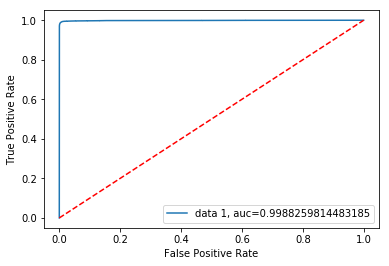

Optimization terminated successfully.
         Current function value: 0.022468
         Iterations 13
Model Summary
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.960      
Dependent Variable: AQI_Range_Binary AIC:              19606.5040 
Date:               2019-03-01 12:35 BIC:              19749.3062 
No. Observations:   435735           Log-Likelihood:   -9790.3    
Df Model:           12               LL-Null:          -2.4395e+05
Df Residuals:       435722           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     13.0000                                       
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
so2            0.0150    0.0024    6.1281  0.0000   0.0102   0.0198
no2            0.3855    0.0140   

In [43]:
data_log_1=dataset.drop(['state','type','date','location','AQI_label','AQI_Range','AQI','AQI_Range_Binary'],axis=1)
x=data_log_1.iloc[:,:]
y=data_log.iloc[:,16]

logistic_regression(x,y)
logit_summary(y,x)

## 3.2 Logistic Model 2 <a id='LogisticModel2'></a>

The Following plot gives us our first Logistic Model along with the summary for the same.

>Training Features :- 'so2', 'no2', 'rspm', 'spm', 'pm2_5', 'si', 'ni', 'rpi', 'spi', 'pmi',
       'year', 'state_label', 'AQI_Range_Binary'

>Target Feature:- 'type_label'


In [44]:
#Logistic Regression Model 2
data_log_2=dataset.drop(['state','type','date','location','AQI_Range','type_label','AQI_label','AQI'],axis=1)


KfoldCrossVal mean score using Logistic regression is 0.6942451235800903 

Logistic Analysis Report
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     62625
           1       0.68      0.54      0.60     46309

   micro avg       0.70      0.70      0.70    108934
   macro avg       0.69      0.68      0.68    108934
weighted avg       0.69      0.70      0.69    108934

[1 0 0 ... 0 0 0]
Accuracy Score:0.70
Probabilty of dependent variable
0.4226097848543553


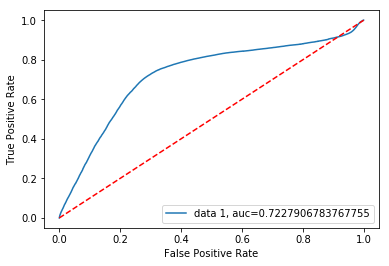

Optimization terminated successfully.
         Current function value: 0.668028
         Iterations 5
Model Summary
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.019      
Dependent Variable: type_label       AIC:              582192.3540
Date:               2019-03-01 12:35 BIC:              582335.1562
No. Observations:   435735           Log-Likelihood:   -2.9108e+05
Df Model:           12               LL-Null:          -2.9687e+05
Df Residuals:       435722           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
so2                0.0092   0.0013   6.9845 0.0000  0.0066  0.0118
no2                0.0631   0.0034  18.

In [45]:
x=data_log_2.iloc[:,:]
y=dataset['type_label']
logistic_regression(x,y)
logit_summary(y,x)

## 3.3 Logistic Model 3 <a id='LogisticModel3'></a>

The Following plot gives us our first Logistic Model along with the summary for the same.

>Training Features :- predictor_names

>Target Feature:- Type_label

KfoldCrossVal mean score using Logistic regression is 0.5841322450241058 

Logistic Analysis Report
              precision    recall  f1-score   support

           0       0.59      0.90      0.71     62625
           1       0.52      0.16      0.24     46309

   micro avg       0.58      0.58      0.58    108934
   macro avg       0.56      0.53      0.48    108934
weighted avg       0.56      0.58      0.51    108934

[0 0 0 ... 0 0 0]
Accuracy Score:0.58
Probabilty of dependent variable
0.4225408596510113


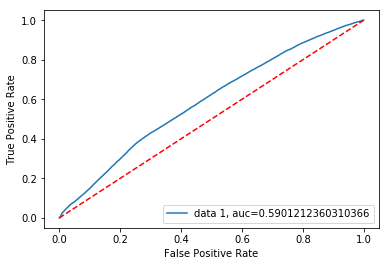

Optimization terminated successfully.
         Current function value: 0.669728
         Iterations 5
Model Summary
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.017      
Dependent Variable: type_label       AIC:              583668.1702
Date:               2019-03-01 12:35 BIC:              583778.0181
No. Observations:   435735           Log-Likelihood:   -2.9182e+05
Df Model:           9                LL-Null:          -2.9687e+05
Df Residuals:       435725           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
so2        0.0090     0.0013     6.7608   0.0000    0.0064    0.0116
no2        0.0594     0.0033   

In [46]:
x=dataset[predictor_names]
y=data_log.iloc[:,13]
logistic_regression(x,y)
logit_summary(y,x)

#### Significant Questions on the basis of the all 3 Logistic Models
##### * Is the relationship significant?   

Relationship between AQI_Range_Binary and all other pollutants and their indexes(independent variable) are significant as we can see the first Logistic Model 1 .
Relationship between type_label(Dependent Variable) and other independent variable is somewhat relatable though we cannot say for sure they are highly related or not.

##### * Are any model assumptions violated?      

The logistic regression method assumes that:

1. The outcome is a binary or dichotomous variable like yes vs no, positive vs negative, 1 vs 0.
2. There is a linear relationship between the logit of the outcome and each predictor variables. Recall that the logit function is logit(p) = log(p/(1-p)), where p is the probabilities of the outcome (see Chapter @ref(logistic-regression)).
3. There is no influential values (extreme values or outliers) in the continuous predictors
4. There is no high intercorrelations (i.e. multicollinearity) among the predictors.

by the results we can say that outcome is binary. Since we have scaled the dataset , there are no outliers and as for multicollinearity please refer to section [Multicollinearity](#Multicollinearity)


##### * Does the model make sense?  Interpret the meaning of each independent variable.  

Except for model 1 in which dependent variable is AQI_Range_Binary accuracy is 99% , so we can say that model makes sense . Since with the value of each independent variable the dependent is increasing.
But for model 2 and model 3 , the dependent variable is Type_label and accuracy is less , so though it does make sense but a better model can be used in its place as well.

##### * Cross-validate the model. How well did it do? 
Cross Validation of each model is done with each models generation. And according to cross validation score only first model gives an accurate score .

##### * Calculate the probability of getting the dependent variable
Done within modeling. Please see each model

## <p style="text-align: center;">4. Multicollinearity</p> <a id='Multicollinearity'></a>

In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

Why Multicollinearity is a problem?
>Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

VIF assesses whether factors are correlated to each other (multicollinearity)
High variance inflation factor means that they "have" the same variance within this dataset. We would need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity.
If the VIF is equal to 1 there is no multicollinearity among factors, but if the VIF is greater than 1, the predictors may be moderately correlated. If the VIF for a factor is near or above 5 we may have to remove highly correlated factors.

In [47]:
def variance_IF(X):
    vif=vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif


#### Table Overview:- For Linear Model 1 we can see that VIF for si, ni is fine but for rpi and spi it is greater than 5. So we can remove one of them and can see the results.

In [48]:
##For first Linear Model
variance_IF(X_1)

,VIF Factor,features
0,2.539488,si
1,4.078304,ni
2,9.391268,rpi
3,7.895238,spi


#### Table Overview:- For Linear Model 2 we can see that VIF for so2, no2 ,spm and pm2_5 is fine. So model needs no change.

In [49]:
##For second Linear Model
variance_IF(X_2)

,VIF Factor,features
0,2.133652,so2
1,3.769806,no2
2,2.950355,spm
3,1.386846,pm2_5


#### Table Overview:- For Linear Model 3 we can see that VIF for rspm, rpi ,spm and spi is much greater than 5. So model needs to be changed on a whole basis.¶

In [50]:
##For third Linear Model
variance_IF(X_3)

,VIF Factor,features
0,13.376360,rspm
1,102.246711,spm
2,20.609314,rpi
3,115.292593,spi


#### Significant Questions on the basis of the all 3 Linear Models
##### * Is there any multi-colinearity in the model?   

Yes there is multicollinearity in all models except for linear model 2 .(based on VIF values calculated)

##### * In the multiple regression models are predictor variables independent of all the other predictor variables?  
For Model 1:- spi and rpi are nor exactly independent of all other predictor variables , since the calculated VIF value is greater than 5.

For Model 2:- Model seems fine, because all the independent variables are not that related since VIF<5.

For Model 3:- The worst model out of all , all the independent variables are dependent on each other highly because VIF value for all are much higher than expected.

##### * In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. 

The regular regression coefficients that we see in statistical output describe the relationship between the independent variables and the dependent variable. The coefficient value represents the mean change of the dependent variable given a one-unit shift in an independent variable Consequently, we might feel that we can use the absolute sizes of the coefficients to identify the most important variable. After all, a larger coefficient signifies a greater change in the mean of the independent variable. However, the independent variables can have dramatically different types of units, which make comparing the coefficients meaningless.

Calculations for p-values include various properties of the variable, but importance is not one of them. A very small p-value does not indicate that the variable is important in a practical sense. 

We have already excluded the variables in the previous answer and about ranking the significant variables. Output for stepwise regression gives us the important variables. [Stepwise Regression](#StepwiseRegression)

##### * Cross-validate the models. How well did they do?   

In [51]:
#Linear Model 1:-
X_M1=X_1[['si','ni']]
print('Linear Model 1')
cross_val(X_M1,y_1)

Linear Model 1
KfoldCrossVal mean score using Linear regression is 0.1141818471690333


In [52]:
#Linear Model 2:-
print('Linear Model 2')
cross_val(X_2,y_2)

Linear Model 2
KfoldCrossVal mean score using Linear regression is 0.9476205911967153


In [53]:
#Linear Model 2:-
print('Linear Model 3')
cross_val(X_3,y_3)

Linear Model 3
KfoldCrossVal mean score using Linear regression is 0.987884797938319


## <p style="text-align: center;">5. Stepwise Regression</p> <a id='StepwiseRegression'></a>

Stepwise regression is a method of fitting regression models in which the choice of predictive variables is carried out by an automatic procedure. (p-value in our case). 

>BACKWARD STEPWISE REGRESSION is a stepwise regression approach, that begins with a full model and at each step gradually eliminates variables from the regression model to find a reduced model that best explains the data. Also known as Backward Elimination regression.

>FORWARD STEPWISE REGRESSION is a type of stepwise regression which begins with an empty model and adds in variables one by one. ... It is one of two commonly used methods of stepwise regression; the other is backward elimination, and is almost opposite.Se

In [58]:
#https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm
import statsmodels.api as sm

X=X_2.astype(float)
y=dataset['AQI']


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)


Add  spm                            with p-value 0.0
Add  no2                            with p-value 0.0
Add  pm2_5                          with p-value 5.88698e-75
Add  so2                            with p-value 0.000601071
resulting features:
['spm', 'no2', 'pm2_5', 'so2']


## Cross Validation of Linear Model 2

(87147, 4) (348588, 4) (87147,) (348588,)
r2_Square:0.95 
MSE:19.97 
KfoldCrossVal mean score using Linear regression is 0.9470348228233364


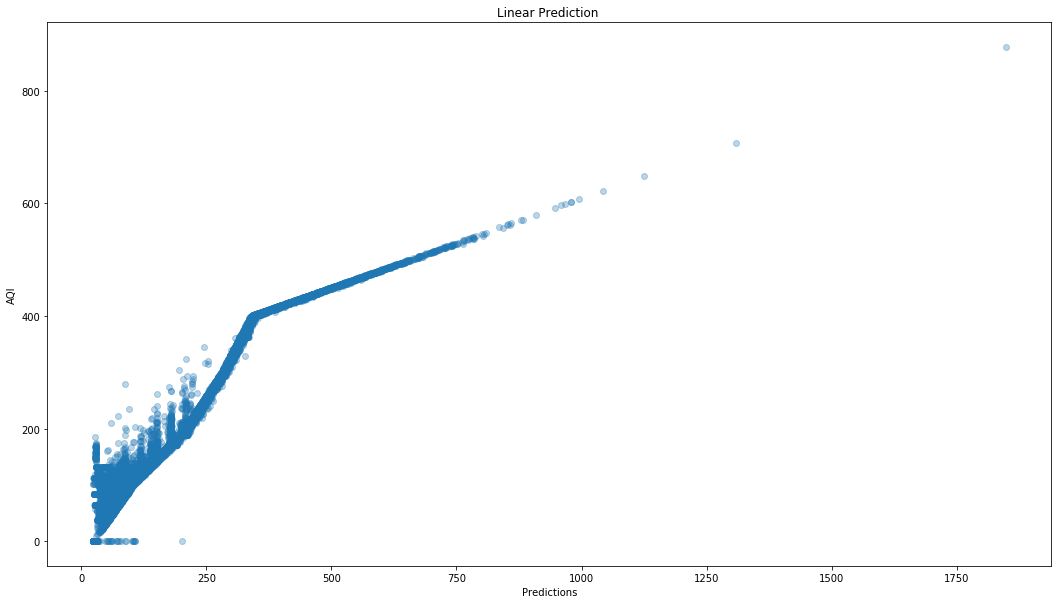

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 6.595e+06
Date:                Fri, 01 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:36:57   Log-Likelihood:            -1.5918e+06
No. Observations:              348588   AIC:                         3.184e+06
Df Residuals:                  348584   BIC:                         3.184e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
so2            0.2229      0.004     59.430      0.0

In [59]:
dataset_LR_2=dataset[['so2', 'spm', 'no2', 'pm2_5']]
target=dataset['AQI']
linear_regression(dataset_LR_2,target)
#X_train, X_test, y_train, y_test = train_test_split(dataset_LR_2, target, test_size=0.2)


## <p style="text-align: center;">6. Interaction Effect</p> <a id='InteractionEffect'></a>
Interaction effects occur when the effect of one variable depends on the value of another variable. Interaction effects are common in regression analysis. In any study, many variables can affect the outcome. Changing these variables can affect the outcome directly. In more complex study areas, the independent variables might interact with each other. Interaction effects indicate that a third variable influences the relationship between an independent and dependent variable. This type of effect makes the model more complex, but if the real world behaves this way, it is critical to incorporate it in your model. 

Here we are taking 3 independant variables and seeing their individual standard error, t score and P values, and these values in presence of each other. And finally we see interaction of age and potential. The 3 independent variables are Age, International Reputation and Potential

Function to calculate the RSS and R2

In [60]:
def evaluateModel (model):
    print("RSS = ", ((dataset.AQI - model.predict())**2).sum())
    print("R2 = ", model.rsquared)

### 6.1 Interaction Effect-All Columns<a id='AllColumns'></a>

In [62]:
modelAll = smf.ols('AQI ~ no2 + rspm + spm', dataset).fit()
print(modelAll.summary().tables[1])
evaluateModel(modelAll)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8801      0.070    329.050      0.000      22.744      23.016
no2            0.0504      0.002     27.713      0.000       0.047       0.054
rspm           0.0600      0.001    109.223      0.000       0.059       0.061
spm            0.7139      0.000   2151.439      0.000       0.713       0.715
RSS =  179857832.31758952
R2 =  0.9491906483676459


### 6.2 Interaction Effect-NO2 & RSPM<a id='NO2RSPM'></a>

In [63]:
modelNo2_rspm = smf.ols('AQI ~ no2 + rspm ', dataset).fit()
print(modelNo2_rspm.summary().tables[1])
evaluateModel(modelNo2_rspm)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.3728      0.214    408.483      0.000      86.954      87.792
no2            0.6161      0.006    100.404      0.000       0.604       0.628
rspm           0.7272      0.002    470.414      0.000       0.724       0.730
RSS =  2090453634.9173393
R2 =  0.40945249679148665


### 6.3 Interaction Effect-NO2 & SPM<a id='NO2SPM'></a>

In [ ]:
modelNo2_spm = sm.ols('AQI ~ no2 + spm ', dataset).fit()
print(modelNo2_spm.summary().tables[1])
evaluateModel(modelNo2_spm)

### 6.4 Interaction Effect-SPM & RSPM<a id='RSPMSPM'></a>

In [64]:
modelspm_rspm = smf.ols('AQI ~ spm + rspm ', dataset).fit()
print(modelspm_rspm.summary().tables[1])
evaluateModel(modelspm_rspm)


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5463      0.065    360.565      0.000      23.418      23.674
spm            0.7152      0.000   2176.408      0.000       0.715       0.716
rspm           0.0631      0.001    117.350      0.000       0.062       0.064
RSS =  180174835.54074362
R2 =  0.9491010958136854


### 6.5 Interaction Effect-SPM<a id='SPM'></a>

In [65]:
model_spm = smf.ols('AQI ~ spm', dataset).fit()
print(model_spm.summary().tables[1])
evaluateModel(model_spm)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.4255      0.064    395.406      0.000      25.300      25.552
spm            0.7389      0.000   2804.060      0.000       0.738       0.739
RSS =  185869145.4010954
R2 =  0.9474924686648409


### 6.6 Interaction Effect-NO2<a id='NO2'></a>

In [66]:
model_no2 = smf.ols('AQI ~ no2', dataset).fit()
print(model_no2.summary().tables[1])
evaluateModel(model_no2)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    141.0492      0.222    634.902      0.000     140.614     141.485
no2            1.6327      0.007    231.519      0.000       1.619       1.646
RSS =  3152104644.9614387
R2 =  0.10953895516197754


### 6.7 Interaction Effect-RSPM<a id='RSPM'></a>

In [67]:
model_rspm = smf.ols('AQI ~ rspm', dataset).fit()
print(model_rspm.summary().tables[1])
evaluateModel(model_rspm)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.1877      0.192    505.028      0.000      96.810      97.565
rspm           0.7819      0.001    534.255      0.000       0.779       0.785
RSS =  2138818202.3212173
R2 =  0.3957896371867353


### 6.8 Interaction Effect-SPM*RSPM<a id='SPM&RSPM'></a>

In [68]:
modelSynergy = smf.ols('AQI ~ spm + rspm + spm*rspm', dataset).fit()
print(modelSynergy.summary().tables[1])
evaluateModel(modelSynergy)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6206      0.088     52.263      0.000       4.447       4.794
spm            0.8011      0.000   1899.661      0.000       0.800       0.802
rspm           0.2194      0.001    300.870      0.000       0.218       0.221
spm:rspm      -0.0006   1.98e-06   -290.525      0.000      -0.001      -0.001
RSS =  150936971.99385083
R2 =  0.95736071326148


### 6.9 Interaction Effect-NO2* SPM<a id='NO2&SPM'></a>

In [69]:
modelSynergy = smf.ols('AQI ~ no2 + spm + no2*spm', dataset).fit()
print(modelSynergy.summary().tables[1])
evaluateModel(modelSynergy)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6125      0.103    161.337      0.000      16.411      16.814
no2            0.3776      0.003    109.635      0.000       0.371       0.384
spm            0.7669      0.000   1771.068      0.000       0.766       0.768
no2:spm       -0.0011   1.14e-05    -97.182      0.000      -0.001      -0.001
RSS =  180861910.883317
R2 =  0.9489069988859682


## <p style="text-align: center;">7. Regularization</p> <a id='Regularization'></a>

Regularization is a very important technique in machine learning to prevent overfitting. Mathematically speaking, it adds a regularization term in order to prevent the coefficients to fit so perfectly to overfit. The difference between the L1 and L2 is just that L2 is the sum of the square of the weights, while L1 is just the sum of the weights

Is there collinearity among some features? L2 regularization can improve prediction quality in this case, as implied by its alternative name, "ridge regression." However, it is true in general that either form of regularization will improve out-of-sample prediction, whether or not there is multicollinearity and whether or not there are irrelevant features, simply because of the shrinkage properties of the regularized estimators. L1 regularization can't help with multicollinearity it will just pick the feature with the largest correlation to the outcome  (which isn't useful if you have an interest in estimating coefficients for all features which are strongly correlated with your target). Ridge regression can obtain coefficient estimates even when you have more features than examples... but the probability that any will be estimated precisely at 0 is 0.

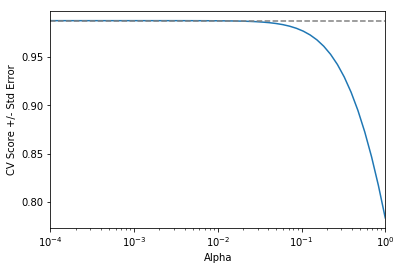

In [80]:
from sklearn.linear_model import Ridge

# Create an array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Use this function to create a plot    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    
    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


In [ ]:
#Regularization:- l2

from sklearn.linear_model import Ridge
#for i in range(0, 1): Matrix
X_train, X_test, y_train, y_test = train_test_split(X_1,y_1, test_size=0.2)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
pred = ridgeReg.predict(X_test)

print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)
print('r2_Square:%.2f '% r2_score(y_test, pred))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, pred)))

regressor_OLS = smf.OLS(y_train, X_train).fit()

plt.figure(figsize=(18,10))
plt.scatter(pred,y_test,alpha = 0.3)
plt.xlabel('Predictions')
plt.ylabel('AQI')
plt.title("Linear Prediction ")
plt.show()
#cross validation    
Kfold = KFold(len(X_1), shuffle=True)
    #X_train = sc.fit_transform(X_train)
    #X_test = sc.transform(X_test)
print("KfoldCrossVal mean score using Linear regression is %s" %cross_val_score(ridgeReg,X_train,y_train,cv=10).mean())


print(regressor_OLS.summary())

In [ ]:
"""X_train, X_test, y_train, y_test = train_test_split(X_3,dataset['AQI'], test_size=0.2)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train,y_train)

print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)
print('r2_Square:%.2f '% r2_score(y_test, pred))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, pred)))

regressor_OLS = smf.OLS(y_train, X_train).fit()

plt.figure(figsize=(18,10))
plt.scatter(pred,y_test,alpha = 0.3)
plt.xlabel('Predictions')
plt.ylabel('AQI')
plt.title("Linear Prediction ")
plt.show()
#cross validation    
Kfold = KFold(len(X), shuffle=True)
    #X_train = sc.fit_transform(X_train)
    #X_test = sc.transform(X_test)
print("KfoldCrossVal mean score using Linear regression is %s" %cross_val_score(lassoReg,X_train,y_train,cv=10).mean())


regressor_OLS.summary()"""

## <p style="text-align: center;">8. Conclusion</p> <a id='Conclusion'></a>
1. We can say that on the basis of AIC, BIC and R^2 value for linear regression Model 1 is the best , since it has low values overall. 
2. Lower the value of AIC and BIC means better model since both measure the loss of data while modeling data, and low value denotes less data is lost overall.
3. AQI is highly correlated with all the independent variables(so2, no2, rspm, spm and pm2_5) .
4. AQI has been increasing over the years.
5. As for logistic regression , only model 1 provides us with accurate results more so because AQI_Range_Binary is the dependent variable we used . But for model 2 and model 3 dependent variable is type_label(sort of area) and the accuracy results are comparitively lower so we can say that though the factors are related to type label in a way but there relations are not enough to be used as for prediction and estimation purposes.
6. As for significant variables concerned we cannot use regular regression coefficients and p-value to calculate the same(explained above).
7. Our dataset also contains multicollinearity, all the independent variables are somewhat related to each other as we can see in our results.
8. After concluding that Multicollinearity do exist in our dataset, and when we try to remove highly multicollinear variables the value of R^2 drops , thus making us conclude that our dataset is not fit for both linear regression and logistic regression (because assumptions for same are violated).
9. After stepwise regression, we conclude that the most significant variables that should be used for regression with our dependent variable are 'so2', 'spm', 'no2', 'pm2_5' (with p-value < 0.05).
10. Regularization as such as no effect on the model, though there is a slight increase in the accuracy and cross_val_score but it is not that big that we should do it.
11. Interaction effect for (spm*rspm) is maximum and that we have utilised and and has gotten good R^2 value

## <p style="text-align: center;">9. Contribution</p> <a id='Contribution'></a>

I contributed around 65% in terms of coding for the given assignment.

## <p style="text-align: center;">10. Citation</p> <a id='Citation'></a>

1. http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/
2. https://github.com/nikbearbrown/INFO_6105/tree/master/Week_2
3. https://www.kaggle.com/anbarivan/indian-air-quality-analysis-prediction-using-ml
4. https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm
5. https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
6. https://www.kaggle.com/marcogdepinto/feature-engineering-eda-data-cleaning-tutorial
7. https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/


## <p style="text-align: center;">11. License</p> <a id='License'></a>


Copyright (c) 2019 Manali Sharma

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

